# Working with Nburst 

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sitelle.process import SpectralCubePatch as SpectralCube
from sitelle.plot import *
from sitelle.nburst import *
from sitelle.utils import *
from scipy.interpolate import UnivariateSpline
import gvar
from sitelle.parallel import parallel_apply_along_axis
from sitelle.constants import FITS_DIR

In [2]:
SN2_ORCS = SpectralCube(FITS_DIR/'orig/M31_SN2.merged.cm1.1.0.hdf5')
SN2_ORCS.correct_wavelength(FITS_DIR/'M31_SN2.1.0.ORCS/M31_SN2.1.0.skymap.fits')
SN2_ORCS.set_wcs('/obs/blaunet/fits/M31_SN2.1.0.ORCS/M31_SN2.1.0.wcs.deep_frame.fits')
SN2_axis = SN2_ORCS.params.base_axis

INFO| Data shape : (2048, 2064, 556)
WARNING| /home/blaunet/orcs/orcs/core.py:1595: UserWarning: Malformed spectral cube. The number of steps in the header (900) does not correspond to the real size of the data cube (556)
  warnings.warn('Malformed spectral cube. The number of steps in the header ({}) does not correspond to the real size of the data cube ({})'.format(step_nb, self.dimz))

INFO| Cube is in WAVENUMBER (cm-1)
INFO| Cube is CALIBRATED in wavenumber
WARNING| /home/blaunet/orb/orb/core.py:416: UserWarning: Parameter already defined
  warnings.warn('Parameter already defined')

INFO| Cube is in WAVENUMBER (cm-1)
INFO| Cube is CALIBRATED in wavenumber


In [110]:
bkg_cube = io.read_fits('/poubelle/blaunet/SN2/calib_bkg_cube.fits')

In [143]:
# from orb.utils.image import nanbin_image
# SN2_binned = nanbin_image(bkg_cube, 20)
# SN2_fwhm = nanbin_image(SN2_ORCS.get_fwhm_map(), 20)

XY = np.mgrid[14:2047:30, 14:2063:30]
X = XY[0]
Y = XY[1]
SN2_binned = bkg_cube[X,Y]
SN2_binned[np.isnan(SN2_binned)] = 0.
SN2_fwhm = SN2_ORCS.get_fwhm_map()[X,Y]

In [144]:
imin, imax = np.searchsorted(SN2_axis, SN2_ORCS.params.filter_range)
from astropy.stats import sigma_clipped_stats
res = parallel_apply_along_axis(sigma_clipped_stats, 2, SN2_binned[...,imax+45:])
SN2_error = res[...,2]

INFO| Init of the parallel processing server with 16 threads


In [159]:
max_map = np.nanmax(SN2_binned, axis=2)

WARNING| /home/blaunet/sitelle_env/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in divide
  """Entry point for launching an IPython kernel.

WARNING| /home/blaunet/sitelle_env/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.



<IPython.core.display.Javascript object>


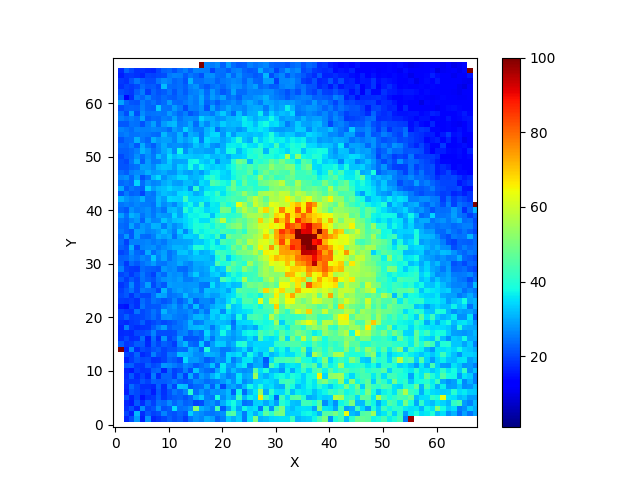

(<matplotlib.figure.Figure at 0x7f1b1504d890>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1b15081ed0>)

In [164]:
plot_map(max_map/SN2_error, cmap='jet', vmin = 1, vmax=100, colorbar=True)

<IPython.core.display.Javascript object>


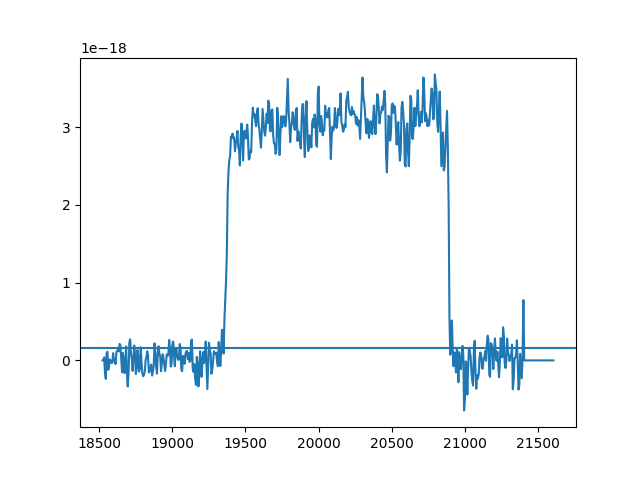

In [145]:
f,ax = plt.subplots()
plot_spectra(SN2_axis, SN2_binned[10,10], ax=ax)
ax.axhline(SN2_error[10,10])

## Creation of the Fitter

In [147]:
SN2_fitter = NburstFitter.from_sitelle_data(SN2_axis, SN2_binned, SN2_error, SN2_fwhm, SN2_ORCS,
                                             FITS_DIR/'nburst_data/SN2/cube/',
                                             '30x30', force=True)
SN2_fitter.configure_fit('MILES', stell_lib='MILES', mdegree=4, force=True)

INFO| Data written as /data/blaunet/fits/nburst_data/SN2/cube/30x30_data.fits in 0.06 s 
INFO| Data written as /data/blaunet/fits/nburst_data/SN2/cube/30x30_fwhm.fits in 0.06 s 
INFO| Data written as /data/blaunet/fits/nburst_data/SN2/cube/30x30_error.fits in 0.06 s 


In [148]:
SN2_fitter.run_fit()

IDL Version 8.5.1 (linux x86_64 m64). (c) 2015, Exelis Visual Information Solutions, Inc., a subsidiary of Harris Corporation.
Installation number: 500817.
Licensed for use by: Observatoire de Meudon


*********************************************
** Personal settings are loaded and active **
*********************************************

Loading paths...
+/usr/local/idl/
+~/nburst/lib/astron/
+~/nburst/lib/mpfit/
+~/nburst/lib/mage-pipeline/
+~/nburst/lib/spiker/
+~/nburst/lib/voronoi_2d_binning/
+~/nburst/
...ok
% Compiled module: VORONOI_CONVERT.
% Compiled module: BINREV.
% Compiled module: BINREVSCL.
% Compiled module: BINREVVEC.
% Compiled module: BINREVCUBE.
% Compiled module: CONVOL_SPEC.
% Compiled module: READMPFS.
% Compiled module: READ_CALIB.
% Compiled module: CONV_MPFS.
% Compiled module: EVALUATE_NBURST_C.
% Compiled module: FITFUNC_PXF_NB_TEMPLATE_C.
% Compiled module: PPXF_NBURSTS.
% Compiled module: READFITS.
% Compiled module: SXPAR.
% Compiled module: GETTOK.
% Com

% PPXF_NBURSTS: MPFIT STATUS= -16
% PPXF_NBURSTS: ERROR: parameter or function value(s) have become infinite;
                 check model function for over- and underflow
% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=             NaN
ibin=      17 /        4692
Preparing templates: convolving...done; deriving...ROBUST_SIGMA: This distribution is TOO WEIRD! Returning -1
% PPXF_NBURSTS: MPFIT STATUS= -16
% PPXF_NBURSTS: ERROR: parameter or function value(s) have become infinite;
                 check model function for over- and underflow
% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=             NaN
ibin=      18 /        4692
Preparing templates: convolving...done; deriving...ROBUST_SIGMA: This distribution is TOO WEIRD! Returning -1
% PPXF_NBURSTS: MPFIT STATUS= -16
% PPXF_NBURSTS: ERROR: parameter or function value(s) have become infinite;
                 check model function for over- and underflow
% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=      

% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=             NaN
ibin=      38 /        4692
Preparing templates: convolving...done; deriving...ROBUST_SIGMA: This distribution is TOO WEIRD! Returning -1
% PPXF_NBURSTS: MPFIT STATUS= -16
% PPXF_NBURSTS: ERROR: parameter or function value(s) have become infinite;
                 check model function for over- and underflow
% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=             NaN
ibin=      39 /        4692
Preparing templates: convolving...done; deriving...ROBUST_SIGMA: This distribution is TOO WEIRD! Returning -1
% PPXF_NBURSTS: MPFIT STATUS= -16
% PPXF_NBURSTS: ERROR: parameter or function value(s) have become infinite;
                 check model function for over- and underflow
% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=             NaN
ibin=      40 /        4692
Preparing templates: convolving...done; deriving...ROBUST_SIGMA: This distribution is TOO WEIRD! Returning -1
% PPXF_NBURSTS: MPFIT S

% PPXF_NBURSTS: MPFIT STATUS= -16
% PPXF_NBURSTS: ERROR: parameter or function value(s) have become infinite;
                 check model function for over- and underflow
% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=             NaN
ibin=      60 /        4692
Preparing templates: convolving...done; deriving...ROBUST_SIGMA: This distribution is TOO WEIRD! Returning -1
% PPXF_NBURSTS: MPFIT STATUS= -16
% PPXF_NBURSTS: ERROR: parameter or function value(s) have become infinite;
                 check model function for over- and underflow
% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=             NaN
ibin=      61 /        4692
Preparing templates: convolving...done; deriving...ROBUST_SIGMA: This distribution is TOO WEIRD! Returning -1
% PPXF_NBURSTS: MPFIT STATUS= -16
% PPXF_NBURSTS: ERROR: parameter or function value(s) have become infinite;
                 check model function for over- and underflow
% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=      

% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=             NaN
ibin=      81 /        4692
Preparing templates: convolving...done; deriving...ROBUST_SIGMA: This distribution is TOO WEIRD! Returning -1
% PPXF_NBURSTS: MPFIT STATUS= -16
% PPXF_NBURSTS: ERROR: parameter or function value(s) have become infinite;
                 check model function for over- and underflow
% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=             NaN
ibin=      82 /        4692
Preparing templates: convolving...done; deriving...ROBUST_SIGMA: This distribution is TOO WEIRD! Returning -1
% PPXF_NBURSTS: MPFIT STATUS= -16
% PPXF_NBURSTS: ERROR: parameter or function value(s) have become infinite;
                 check model function for over- and underflow
% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=             NaN
ibin=      83 /        4692
Preparing templates: convolving...done; deriving...ROBUST_SIGMA: This distribution is TOO WEIRD! Returning -1
% PPXF_NBURSTS: MPFIT S

V_corr=      -262.63280
ibin=     104 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      82      62.3   121.9   0.004  -0.005   0.000   0.000   0.472     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.231   7.58e-10
V_corr=      -270.52780
ibin=     105 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     138      63.7   121.8   0.039   0.037   0.000   0.000   0.462     NaN
Ages, Metallicities, Weights:
   3.43e+03    -0.0289   1.91e-10
V_corr=      -269.06532
ibin=     106 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     106     100.5   153.4   0.033  -0.019   0.000   0.000   0.515     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     140     148.3   115.2  -0.033   0.023   0.000   0.000   0.642     NaN
Ages, Metallicities, Weights:
   5.86e+03    -0.0854   3.07e-10
V_corr=      -184.54258
ibin=     128 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     160     105.5   167.6   0.017   0.049   0.000   0.000   0.419     NaN
Ages, Metallicities, Weights:
   3.76e+03      0.549   3.34e-10
V_corr=      -227.28262
ibin=     129 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      94     129.8   141.4   0.045   0.002   0.000   0.000   0.327     NaN
Ages, Metallicities, Weights:
   1.86e+04     -0.353   6.21e-10
V_corr=      -203.00745
ibin=     130 /        4692
Preparing templates: convolving.

     118      43.2   178.5  -0.002   0.030   0.000   0.000   0.894     NaN
Ages, Metallicities, Weights:
   1.04e+03      0.556   4.73e-11
V_corr=      -289.62269
ibin=     151 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      95      77.7   134.6  -0.018  -0.003   0.000   0.000   0.606     NaN
Ages, Metallicities, Weights:
   1.01e+04     -0.304   2.24e-10
V_corr=      -255.14019
ibin=     152 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     149      54.8   152.3   0.040   0.044   0.000   0.000   0.669     NaN
Ages, Metallicities, Weights:
   7.15e+03   -0.00672   2.15e-10
V_corr=      -277.98943
ibin=     153 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

V_corr=      -272.16006
ibin=     174 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     118      61.5   143.3   0.028   0.004   0.000   0.000   0.693     NaN
Ages, Metallicities, Weights:
   7.62e+03    -0.0864   4.10e-10
V_corr=      -271.34346
ibin=     175 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      93      63.1   126.7   0.052   0.040   0.000   0.000   0.501     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.245   7.95e-10
V_corr=      -269.75300
ibin=     176 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     149      81.8    96.6  -0.010   0.033   0.000   0.000   0.414     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     118     128.3   148.0  -0.069   0.023   0.000   0.000   0.423     NaN
Ages, Metallicities, Weights:
   1.28e+03      0.616   1.13e-10
V_corr=      -204.55550
ibin=     198 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     105     148.4   122.9  -0.019  -0.001   0.000   0.000   0.419     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.157   7.84e-10
V_corr=      -184.39844
ibin=     199 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     159     108.0   163.4  -0.057  -0.045   0.000   0.000   0.559     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.110   8.41e-10
V_corr=      -224.76250
ibin=     200 /        4692
Preparing templates: convolving.

     148     105.3   152.2   0.016  -0.008   0.000   0.000   0.564     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.223   4.32e-10
V_corr=      -227.47176
ibin=     221 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     106      53.5   117.0   0.017   0.004   0.000   0.000   0.605     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.544   3.23e-10
V_corr=      -279.33098
ibin=     222 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     117      57.5   137.9   0.006  -0.021   0.000   0.000   0.949     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.580   3.31e-10
V_corr=      -275.34835
ibin=     223 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

V_corr=      -283.09638
ibin=     244 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     115      76.8   146.1   0.032   0.008   0.000   0.000   0.292     NaN
Ages, Metallicities, Weights:
   3.14e+03    -0.0237   2.04e-10
V_corr=      -256.05206
ibin=     245 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     115      72.7   133.6  -0.047   0.027   0.000   0.000   0.517     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0201   9.94e-10
V_corr=      -260.11253
ibin=     246 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      94      85.3   159.9  -0.023   0.002   0.000   0.000   0.426     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     138     152.7   145.9   0.004  -0.071   0.000   0.000   0.496     NaN
Ages, Metallicities, Weights:
   7.73e+03     0.0775   4.92e-10
V_corr=      -180.08672
ibin=     268 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      82     121.7   145.8  -0.016  -0.002   0.000   0.000   0.461     NaN
Ages, Metallicities, Weights:
   1.58e+04    -0.0662   7.20e-10
V_corr=      -211.11311
ibin=     269 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     174     126.5   150.1   0.029  -0.048   0.000   0.000   0.350     NaN
Ages, Metallicities, Weights:
   1.20e+03      0.585   1.08e-10
V_corr=      -206.31491
ibin=     270 /        4692
Preparing templates: convolving.

     139      61.9   180.6   0.011   0.002   0.000   0.000   0.929     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.249   4.39e-10
V_corr=      -270.88559
ibin=     291 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      94      37.0   124.0  -0.002   0.030   0.000   0.000   0.541     NaN
Ages, Metallicities, Weights:
   1.57e+04     -0.690   2.63e-10
V_corr=      -295.85059
ibin=     292 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     296     108.2   169.4   0.003  -0.021   0.000   0.000   0.787     NaN
Ages, Metallicities, Weights:
   8.25e+03     -0.173   2.36e-10
V_corr=      -224.61695
ibin=     293 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

V_corr=      -246.40727
ibin=     314 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     105      97.4   158.0   0.023  -0.004   0.000   0.000   0.467     NaN
Ages, Metallicities, Weights:
   1.07e+04     0.0467   7.36e-10
V_corr=      -235.42167
ibin=     315 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     151      74.3   138.5   0.039   0.039   0.000   0.000   0.498     NaN
Ages, Metallicities, Weights:
   4.99e+03      0.103   3.65e-10
V_corr=      -258.46130
ibin=     316 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      81      96.3    93.9  -0.025   0.004   0.000   0.000   0.576     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      82     138.4   148.1   0.003   0.011   0.000   0.000   0.404     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.167   8.03e-10
V_corr=      -194.39809
ibin=     338 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     128     147.8   145.6   0.031  -0.072   0.000   0.000   0.517     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.276   7.72e-10
V_corr=      -184.99771
ibin=     339 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     117     114.0   150.1   0.069   0.025   0.000   0.000   0.458     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.260   7.20e-10
V_corr=      -218.85572
ibin=     340 /        4692
Preparing templates: convolving.

     115      23.4   162.1  -0.008   0.000   0.000   0.000   0.654     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.439   3.97e-10
V_corr=      -309.44290
ibin=     361 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     131      37.4   156.6   0.053   0.011   0.000   0.000   0.806     NaN
Ages, Metallicities, Weights:
       706.      0.631   4.04e-11
V_corr=      -295.42972
ibin=     362 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     171      40.5   232.5  -0.058   0.044   0.000   0.000   1.188     NaN
Ages, Metallicities, Weights:
   1.98e+04      0.101   6.09e-10
V_corr=      -292.30100
ibin=     363 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

V_corr=      -252.90015
ibin=     384 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     105      66.3   122.0   0.070   0.027   0.000   0.000   0.375     NaN
Ages, Metallicities, Weights:
   2.47e+03    -0.0180   1.82e-10
V_corr=      -266.52845
ibin=     385 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      94      82.1   141.3   0.096   0.013   0.000   0.000   0.338     NaN
Ages, Metallicities, Weights:
   6.68e+03    -0.0118   4.73e-10
V_corr=      -250.69597
ibin=     386 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      95     110.0   128.6   0.004  -0.022   0.000   0.000   0.378     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     105     130.4   114.0   0.001  -0.020   0.000   0.000   0.329     NaN
Ages, Metallicities, Weights:
   3.27e+03     0.0427   2.03e-10
V_corr=      -202.43946
ibin=     408 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     126     131.8   126.5  -0.000  -0.021   0.000   0.000   0.578     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.213   7.82e-10
V_corr=      -201.03272
ibin=     409 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      96     105.2   117.4   0.121  -0.026   0.000   0.000   0.554     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.218   7.68e-10
V_corr=      -227.62072
ibin=     410 /        4692
Preparing templates: convolving.

     183      47.4   186.8   0.017   0.060   0.000   0.000   0.474     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0723   5.30e-10
V_corr=      -285.39576
ibin=     431 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     172      41.1   232.0   0.026  -0.030   0.000   0.000   0.448     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.267   5.08e-10
V_corr=      -291.73399
ibin=     432 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     139      59.0   132.3   0.037   0.057   0.000   0.000   0.609     NaN
Ages, Metallicities, Weights:
   1.51e+04     -0.252   3.92e-10
V_corr=      -273.82426
ibin=     433 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

V_corr=      -268.58101
ibin=     454 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     126      74.5   165.4  -0.042   0.014   0.000   0.000   0.543     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.155   1.05e-09
V_corr=      -258.34533
ibin=     455 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     116      91.8   146.2   0.056   0.031   0.000   0.000   0.440     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.191   1.03e-09
V_corr=      -241.04677
ibin=     456 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     105      70.8   125.0  -0.026   0.052   0.000   0.000   0.531     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     128     125.3   153.0  -0.077  -0.044   0.000   0.000   0.287     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0925   8.76e-10
V_corr=      -207.51397
ibin=     478 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     117     125.1   146.5   0.027   0.049   0.000   0.000   0.357     NaN
Ages, Metallicities, Weights:
   9.19e+03      0.211   5.72e-10
V_corr=      -207.73684
ibin=     479 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     137     152.3   163.9  -0.012  -0.099   0.000   0.000   0.382     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.260   7.24e-10
V_corr=      -180.55360
ibin=     480 /        4692
Preparing templates: convolving.

     128      95.6   243.3   0.047  -0.046   0.000   0.000   0.831     NaN
Ages, Metallicities, Weights:
   4.38e+03      0.195   1.98e-10
V_corr=      -237.22309
ibin=     501 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     195      43.8   137.1   0.053   0.020   0.000   0.000   0.799     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.224   5.27e-10
V_corr=      -289.00387
ibin=     502 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     118      51.6    90.3  -0.002   0.018   0.000   0.000   0.686     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.442   4.55e-10
V_corr=      -281.24234
ibin=     503 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

V_corr=      -223.65064
ibin=     524 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     106      76.1   159.8  -0.034   0.043   0.000   0.000   0.273     NaN
Ages, Metallicities, Weights:
   1.98e+04    0.00314   1.19e-09
V_corr=      -256.67126
ibin=     525 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     104      81.3   140.0  -0.001  -0.025   0.000   0.000   0.374     NaN
Ages, Metallicities, Weights:
   1.74e+03      0.527   2.09e-10
V_corr=      -251.51253
ibin=     526 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     117      92.9   125.7  -0.028   0.032   0.000   0.000   0.436     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     127     119.4   175.0  -0.023  -0.045   0.000   0.000   0.609     NaN
Ages, Metallicities, Weights:
   7.59e+03     0.0578   3.65e-10
V_corr=      -213.41569
ibin=     548 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     139     137.6   205.9   0.011   0.036   0.000   0.000   0.448     NaN
Ages, Metallicities, Weights:
   6.77e+03      0.672   3.80e-10
V_corr=      -195.21952
ibin=     549 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     148     171.8   151.3   0.043  -0.006   0.000   0.000   0.339     NaN
Ages, Metallicities, Weights:
   1.90e+04     -0.212   5.26e-10
V_corr=      -161.04115
ibin=     550 /        4692
Preparing templates: convolving.

     154      56.2   109.3   0.011   0.023   0.000   0.000   0.702     NaN
Ages, Metallicities, Weights:
   2.41e+03     -0.222   9.07e-11
V_corr=      -276.56747
ibin=     571 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      95      34.3   114.0  -0.027   0.020   0.000   0.000   0.921     NaN
Ages, Metallicities, Weights:
   5.62e+03     -0.180   2.13e-10
V_corr=      -298.49980
ibin=     572 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     117      25.2   118.8   0.017   0.039   0.000   0.000   0.533     NaN
Ages, Metallicities, Weights:
   1.32e+03      0.183   6.48e-11
V_corr=      -307.64722
ibin=     573 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

V_corr=      -229.44119
ibin=     594 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     118      85.0   149.5  -0.074   0.047   0.000   0.000   0.569     NaN
Ages, Metallicities, Weights:
   8.59e+03      0.189   7.57e-10
V_corr=      -247.85479
ibin=     595 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     105      97.2   152.9  -0.045  -0.007   0.000   0.000   0.551     NaN
Ages, Metallicities, Weights:
   6.43e+03     0.0237   5.23e-10
V_corr=      -235.64447
ibin=     596 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     103     105.2   155.3  -0.024   0.016   0.000   0.000   0.452     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     129     110.0   210.0  -0.004  -0.022   0.000   0.000   0.437     NaN
Ages, Metallicities, Weights:
   1.58e+04      0.267   8.32e-10
V_corr=      -222.76091
ibin=     618 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     151     181.5   142.4  -0.022  -0.072   0.000   0.000   0.605     NaN
Ages, Metallicities, Weights:
   7.51e+03     0.0193   3.57e-10
V_corr=      -151.32134
ibin=     619 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      96     187.0   140.8   0.037   0.009   0.000   0.000   0.633     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.337   5.09e-10
V_corr=      -145.75935
ibin=     620 /        4692
Preparing templates: convolving.

     106      53.1    86.3   0.013  -0.001   0.000   0.000   0.775     NaN
Ages, Metallicities, Weights:
   8.53e+03     -0.772   2.05e-10
V_corr=      -279.69344
ibin=     641 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     137      39.2   106.5   0.015   0.032   0.000   0.000   0.466     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.541   5.10e-10
V_corr=      -293.58599
ibin=     642 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     161      62.5   139.4   0.032   0.050   0.000   0.000   1.054     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.285   6.18e-10
V_corr=      -270.30668
ibin=     643 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

V_corr=      -233.03533
ibin=     664 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      94      84.4   128.7   0.031  -0.019   0.000   0.000   0.395     NaN
Ages, Metallicities, Weights:
   2.38e+03     0.0489   2.20e-10
V_corr=      -248.41701
ibin=     665 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      83      98.7   142.3   0.004  -0.013   0.000   0.000   0.626     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.308   1.07e-09
V_corr=      -234.09618
ibin=     666 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     126      76.5   156.7   0.050   0.009   0.000   0.000   0.518     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     138     158.6   102.0  -0.016   0.018   0.000   0.000   0.605     NaN
Ages, Metallicities, Weights:
       940.     0.0701   4.38e-11
V_corr=      -174.19188
ibin=     688 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     151     169.7   211.4  -0.019   0.036   0.000   0.000   0.707     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0438   6.15e-10
V_corr=      -163.14881
ibin=     689 /        4692
Preparing templates: convolving...done; deriving...ROBUST_SIGMA: This distribution is TOO WEIRD! Returning -1
% PPXF_NBURSTS: MPFIT STATUS= -16
% PPXF_NBURSTS: ERROR: parameter or function value(s) have become infinite;
                 check model function for over- and underflow
% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=             NaN
ibin=     690 /        4692


     114      36.0   147.4   0.080  -0.044   0.000   0.000   0.291     NaN
Ages, Metallicities, Weights:
   7.78e+03     -0.111   3.42e-10
V_corr=      -296.81644
ibin=     711 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      71      49.2    90.5  -0.018  -0.000   0.000   0.000   0.842     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.334   6.33e-10
V_corr=      -283.59956
ibin=     712 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     153      -0.5   140.2   0.102   0.021   0.000   0.000   0.486     NaN
Ages, Metallicities, Weights:
   1.59e+04     -0.511   4.67e-10
V_corr=      -333.28692
ibin=     713 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

V_corr=      -229.68328
ibin=     734 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      95      90.0   152.3   0.028   0.004   0.000   0.000   0.513     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.164   1.26e-09
V_corr=      -242.76718
ibin=     735 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     105     100.8   154.2  -0.065   0.024   0.000   0.000   0.635     NaN
Ages, Metallicities, Weights:
   1.38e+04     0.0155   1.06e-09
V_corr=      -232.05222
ibin=     736 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     167     122.2   162.5  -0.056   0.072   0.000   0.000   0.472     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     127     147.3   155.4  -0.015  -0.027   0.000   0.000   0.808     NaN
Ages, Metallicities, Weights:
   3.76e+03      0.111   2.02e-10
V_corr=      -185.53827
ibin=     758 /        4692
Preparing templates: convolving...done; deriving...ROBUST_SIGMA: This distribution is TOO WEIRD! Returning -1
% PPXF_NBURSTS: MPFIT STATUS= -16
% PPXF_NBURSTS: ERROR: parameter or function value(s) have become infinite;
                 check model function for over- and underflow
% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=             NaN
ibin=     759 /        4692
Preparing templates: convolving...done; deriving...ROBUST_SIGMA: This distribution is TOO WEIRD! Returning -1
% PPXF_NBURSTS: MPFIT STATUS= -16
% PPXF_NBURSTS: ERROR: parameter or function value(s) have become infinite;
                 check model function for over- and underflow
% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=             

     105      29.9   143.7   0.008   0.046   0.000   0.000   0.541     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.304   6.52e-10
V_corr=      -302.89821
ibin=     781 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     105      20.5    83.0  -0.005   0.015   0.000   0.000   0.655     NaN
Ages, Metallicities, Weights:
   1.28e+03    -0.0146   6.72e-11
V_corr=      -312.35490
ibin=     782 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     138      38.4   109.1  -0.007   0.073   0.000   0.000   0.592     NaN
Ages, Metallicities, Weights:
   4.16e+03    -0.0559   2.26e-10
V_corr=      -294.36188
ibin=     783 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

V_corr=      -250.75200
ibin=     804 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     127      89.8   121.9   0.013   0.023   0.000   0.000   0.503     NaN
Ages, Metallicities, Weights:
   1.82e+04    -0.0762   1.27e-09
V_corr=      -243.04396
ibin=     805 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     126     102.2   161.3   0.040  -0.010   0.000   0.000   0.456     NaN
Ages, Metallicities, Weights:
   1.56e+04     0.0442   1.26e-09
V_corr=      -230.60750
ibin=     806 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      96     121.6   119.7  -0.064   0.069   0.000   0.000   0.519     NaN
Ages, Metal

% PPXF_NBURSTS: MPFIT STATUS= -16
% PPXF_NBURSTS: ERROR: parameter or function value(s) have become infinite;
                 check model function for over- and underflow
% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=             NaN
ibin=     828 /        4692
Preparing templates: convolving...done; deriving...ROBUST_SIGMA: This distribution is TOO WEIRD! Returning -1
% PPXF_NBURSTS: MPFIT STATUS= -16
% PPXF_NBURSTS: ERROR: parameter or function value(s) have become infinite;
                 check model function for over- and underflow
% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=             NaN
ibin=     829 /        4692
Preparing templates: convolving...done; deriving...ROBUST_SIGMA: This distribution is TOO WEIRD! Returning -1
% PPXF_NBURSTS: MPFIT STATUS= -16
% PPXF_NBURSTS: ERROR: parameter or function value(s) have become infinite;
                 check model function for over- and underflow
% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=      

      95      33.9   124.1   0.033   0.008   0.000   0.000   0.503     NaN
Ages, Metallicities, Weights:
   2.90e+03     -0.333   1.37e-10
V_corr=      -298.87099
ibin=     851 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     104      -7.9   141.9   0.026   0.023   0.000   0.000   0.474     NaN
Ages, Metallicities, Weights:
   1.91e+04     -0.179   7.72e-10
V_corr=      -340.74329
ibin=     852 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      84      35.5   132.7  -0.035   0.045   0.000   0.000   0.438     NaN
Ages, Metallicities, Weights:
   3.90e+03      0.175   2.69e-10
V_corr=      -297.28800
ibin=     853 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

V_corr=      -229.86244
ibin=     874 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     169     100.7   164.3  -0.007  -0.023   0.000   0.000   0.394     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0252   1.47e-09
V_corr=      -232.07937
ibin=     875 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      71      97.1   112.7  -0.030  -0.027   0.000   0.000   0.589     NaN
Ages, Metallicities, Weights:
   5.03e+03     -0.175   4.31e-10
V_corr=      -235.75852
ibin=     876 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     126      89.2   142.1  -0.023   0.024   0.000   0.000   0.496     NaN
Ages, Metal

% PPXF_NBURSTS: MPFIT STATUS= -16
% PPXF_NBURSTS: ERROR: parameter or function value(s) have become infinite;
                 check model function for over- and underflow
% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=             NaN
ibin=     898 /        4692
Preparing templates: convolving...done; deriving...ROBUST_SIGMA: This distribution is TOO WEIRD! Returning -1
% PPXF_NBURSTS: MPFIT STATUS= -16
% PPXF_NBURSTS: ERROR: parameter or function value(s) have become infinite;
                 check model function for over- and underflow
% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=             NaN
ibin=     899 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     171      49.2   180.1   0.037   0.010   0.000   0.000   0.998     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.202   4.22e-10
V_corr=      -283.56900
ibin=     900 /      

Ages, Metallicities, Weights:
   1.98e+04     -0.263   7.84e-10
V_corr=      -318.55241
ibin=     921 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      72      50.6   137.8   0.044   0.006   0.000   0.000   0.639     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.223   8.47e-10
V_corr=      -282.17704
ibin=     922 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     129      53.9    99.8  -0.048   0.038   0.000   0.000   0.660     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.335   7.90e-10
V_corr=      -278.86553
ibin=     923 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     127      46.8   1

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      81      93.6   152.7  -0.023   0.034   0.000   0.000   0.724     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.151   1.43e-09
V_corr=      -239.22985
ibin=     945 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     104      95.8   140.8   0.042   0.015   0.000   0.000   0.347     NaN
Ages, Metallicities, Weights:
   1.31e+04     -0.109   9.90e-10
V_corr=      -236.98055
ibin=     946 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     138      83.6   173.4   0.023   0.023   0.000   0.000   0.495     NaN
Ages, Metallicities, Weights:
   1.87e+04      0.204   1.65e-09
V_corr=      -249.17428
ibin=     947 /        4692
Preparing templates: convolving.

% PPXF_NBURSTS: ERROR: parameter or function value(s) have become infinite;
                 check model function for over- and underflow
% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=             NaN
ibin=     968 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      92     -18.4   212.3   0.045  -0.013   0.000   0.000   1.091     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.442   3.45e-10
V_corr=      -351.21514
ibin=     969 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     162      43.8   119.6   0.037   0.023   0.000   0.000   1.536     NaN
Ages, Metallicities, Weights:
   1.53e+04     -0.700   2.35e-10
V_corr=      -289.04608
ibin=     970 /        4692
Preparing templates: convolving...done; deriving...% PPXF_N

Ages, Metallicities, Weights:
   1.98e+04     -0.127   9.33e-10
V_corr=      -294.03620
ibin=     991 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     126      32.8   142.1   0.014   0.012   0.000   0.000   0.426     NaN
Ages, Metallicities, Weights:
   8.71e+03     -0.173   4.71e-10
V_corr=      -300.05479
ibin=     992 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     118      45.1   124.5  -0.037   0.056   0.000   0.000   0.648     NaN
Ages, Metallicities, Weights:
   8.73e+03     -0.126   4.94e-10
V_corr=      -287.70407
ibin=     993 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     151      30.5   1

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     114     101.7   160.4  -0.012  -0.009   0.000   0.000   0.448     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.194   1.38e-09
V_corr=      -231.08236
ibin=    1015 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     168      99.4   155.8  -0.035  -0.085   0.000   0.000   0.589     NaN
Ages, Metallicities, Weights:
   1.54e+04     -0.166   1.18e-09
V_corr=      -233.38142
ibin=    1016 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     115     119.6   121.6  -0.036   0.055   0.000   0.000   0.668     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0197   1.45e-09
V_corr=      -213.18620
ibin=    1017 /        4692
Preparing templates: convolving.

     140      -0.6   204.4   0.054  -0.006   0.000   0.000   1.954     NaN
Ages, Metallicities, Weights:
   2.56e+03     0.0996   9.87e-11
V_corr=      -333.39823
ibin=    1038 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     116      31.2   167.5   0.008   0.062   0.000   0.000   1.260     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.281   3.98e-10
V_corr=      -301.59737
ibin=    1039 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     106      38.1    30.1  -0.000  -0.001   0.000   0.000   4.472     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.879   3.00e-10
V_corr=      -294.72240
ibin=    1040 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

V_corr=      -313.59449
ibin=    1061 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     129      35.5   156.0  -0.074   0.076   0.000   0.000   0.578     NaN
Ages, Metallicities, Weights:
   5.84e+03      0.179   4.62e-10
V_corr=      -297.32187
ibin=    1062 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     105      54.8   157.1   0.033  -0.045   0.000   0.000   0.522     NaN
Ages, Metallicities, Weights:
   8.11e+03     -0.175   4.95e-10
V_corr=      -277.99309
ibin=    1063 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     105      57.0   116.3  -0.037   0.022   0.000   0.000   0.411     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      92      97.7   171.7  -0.090  -0.033   0.000   0.000   0.453     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0277   1.58e-09
V_corr=      -235.13872
ibin=    1085 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     112     103.1   167.9  -0.022   0.025   0.000   0.000   0.619     NaN
Ages, Metallicities, Weights:
   1.98e+04     0.0877   1.62e-09
V_corr=      -229.73260
ibin=    1086 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     102      93.6   163.0  -0.031   0.036   0.000   0.000   0.575     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0221   1.48e-09
V_corr=      -239.18275
ibin=    1087 /        4692
Preparing templates: convolving.

     173      34.6   209.8   0.041   0.040   0.000   0.000   1.130     NaN
Ages, Metallicities, Weights:
   8.15e+03      0.562   3.30e-10
V_corr=      -298.22692
ibin=    1108 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     260      33.8   199.9   0.010   0.069   0.000   0.000   1.322     NaN
Ages, Metallicities, Weights:
   1.29e+03      0.428   5.45e-11
V_corr=      -298.97020
ibin=    1109 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     128      63.5   192.2  -0.020  -0.019   0.000   0.000   0.690     NaN
Ages, Metallicities, Weights:
   1.52e+04     -0.459   3.02e-10
V_corr=      -269.31581
ibin=    1110 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

V_corr=      -302.87766
ibin=    1131 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     136      39.1   160.7   0.002   0.001   0.000   0.000   0.404     NaN
Ages, Metallicities, Weights:
   9.82e+03     -0.129   6.26e-10
V_corr=      -293.70371
ibin=    1132 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     138      51.2   136.8  -0.054   0.038   0.000   0.000   0.442     NaN
Ages, Metallicities, Weights:
   1.79e+04    -0.0638   1.14e-09
V_corr=      -281.62954
ibin=    1133 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      94      53.6   137.7  -0.033  -0.026   0.000   0.000   0.414     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     148      75.7   187.4  -0.061   0.088   0.000   0.000   0.578     NaN
Ages, Metallicities, Weights:
   1.98e+04      0.290   1.84e-09
V_corr=      -257.07242
ibin=    1155 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      83      96.7   150.8  -0.015  -0.005   0.000   0.000   0.446     NaN
Ages, Metallicities, Weights:
   1.52e+04    -0.0750   1.21e-09
V_corr=      -236.14621
ibin=    1156 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     104      97.8   135.1   0.055   0.047   0.000   0.000   0.387     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0718   1.40e-09
V_corr=      -234.96211
ibin=    1157 /        4692
Preparing templates: convolving.

     172     -26.1   186.1   0.031   0.050   0.000   0.000   1.493     NaN
Ages, Metallicities, Weights:
   1.16e+03      0.608   6.00e-11
V_corr=      -358.88137
ibin=    1178 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     318     -24.8    62.7   0.002   0.000   0.000   0.000   1.143     NaN
Ages, Metallicities, Weights:
   1.28e+04      -1.12   1.89e-10
V_corr=      -357.58945
ibin=    1179 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     205      -2.3   173.1   0.010   0.060   0.000   0.000   1.273     NaN
Ages, Metallicities, Weights:
   7.04e+03     0.0603   2.66e-10
V_corr=      -335.09474
ibin=    1180 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

V_corr=      -272.79418
ibin=    1201 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     104      52.0   169.8  -0.019   0.007   0.000   0.000   0.540     NaN
Ages, Metallicities, Weights:
   6.89e+03      0.153   6.78e-10
V_corr=      -280.80680
ibin=    1202 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     117      55.3   137.1   0.015   0.043   0.000   0.000   0.361     NaN
Ages, Metallicities, Weights:
   3.33e+03     0.0680   3.08e-10
V_corr=      -277.53421
ibin=    1203 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      84      43.3   147.3  -0.045  -0.001   0.000   0.000   0.484     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     117     104.8   154.7  -0.050   0.006   0.000   0.000   0.438     NaN
Ages, Metallicities, Weights:
   1.68e+03      0.499   2.62e-10
V_corr=      -227.99753
ibin=    1225 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     211     124.3   149.6  -0.048  -0.008   0.000   0.000   0.346     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.121   1.45e-09
V_corr=      -208.49607
ibin=    1226 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     105     104.9   145.2  -0.090   0.054   0.000   0.000   0.356     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.149   1.32e-09
V_corr=      -227.89848
ibin=    1227 /        4692
Preparing templates: convolving.

     174     -23.1    61.1  -0.001   0.008   0.000   0.000   1.437     NaN
Ages, Metallicities, Weights:
   2.43e+03     -0.575   6.25e-11
V_corr=      -355.89290
ibin=    1248 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     165     -39.0    28.9   0.000  -0.002   0.000   0.000   0.843     NaN
Ages, Metallicities, Weights:
   1.12e+04      -1.12   2.27e-10
V_corr=      -371.80513
ibin=    1249 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     332      20.0    89.2  -0.013   0.025   0.000   0.000   0.996     NaN
Ages, Metallicities, Weights:
   5.41e+03     -0.592   1.42e-10
V_corr=      -312.77155
ibin=    1250 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

V_corr=      -289.78163
ibin=    1271 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     105      29.6   192.0  -0.039  -0.024   0.000   0.000   0.583     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.142   1.38e-09
V_corr=      -303.18696
ibin=    1272 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     105      58.6   144.2   0.003   0.013   0.000   0.000   0.662     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.113   1.46e-09
V_corr=      -274.18026
ibin=    1273 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     178      56.6   178.5  -0.001  -0.049   0.000   0.000   0.361     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     157     113.9   168.5  -0.025  -0.006   0.000   0.000   0.379     NaN
Ages, Metallicities, Weights:
   1.98e+04     0.0867   1.68e-09
V_corr=      -218.86924
ibin=    1295 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     116     102.0   160.5   0.027  -0.012   0.000   0.000   0.363     NaN
Ages, Metallicities, Weights:
   1.24e+04    -0.0310   1.06e-09
V_corr=      -230.78332
ibin=    1296 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     148      84.8   168.8   0.007   0.081   0.000   0.000   0.617     NaN
Ages, Metallicities, Weights:
   1.98e+04      0.143   1.58e-09
V_corr=      -248.04260
ibin=    1297 /        4692
Preparing templates: convolving.

      70      18.7   128.9   0.005   0.023   0.000   0.000   2.062     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.469   4.25e-10
V_corr=      -314.07515
ibin=    1318 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     140      16.6    89.5  -0.003   0.007   0.000   0.000   1.102     NaN
Ages, Metallicities, Weights:
   1.42e+04     -0.708   2.92e-10
V_corr=      -316.20788
ibin=    1319 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     195      68.5   217.5   0.006  -0.052   0.000   0.000   1.039     NaN
Ages, Metallicities, Weights:
   1.90e+04     -0.245   6.07e-10
V_corr=      -264.29757
ibin=    1320 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

V_corr=      -273.79441
ibin=    1341 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     140      47.2   156.0  -0.052   0.090   0.000   0.000   0.432     NaN
Ages, Metallicities, Weights:
   7.78e+03      0.133   9.04e-10
V_corr=      -285.60942
ibin=    1342 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     136      59.7   158.3   0.002  -0.038   0.000   0.000   0.830     NaN
Ages, Metallicities, Weights:
   6.77e+03    -0.0173   7.98e-10
V_corr=      -273.08683
ibin=    1343 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     116      48.4   176.7  -0.064   0.022   0.000   0.000   0.588     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     151      93.8   210.3  -0.044   0.071   0.000   0.000   0.438     NaN
Ages, Metallicities, Weights:
   1.98e+04      0.386   1.96e-09
V_corr=      -239.04422
ibin=    1365 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     138      89.5   141.7  -0.003   0.121   0.000   0.000   0.476     NaN
Ages, Metallicities, Weights:
   1.98e+04     0.0242   1.40e-09
V_corr=      -243.31823
ibin=    1366 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      94     113.2   140.8   0.044   0.068   0.000   0.000   0.664     NaN
Ages, Metallicities, Weights:
   1.98e+04     0.0289   1.41e-09
V_corr=      -219.63207
ibin=    1367 /        4692
Preparing templates: convolving.

     104       6.6   147.3   0.020   0.002   0.000   0.000   1.111     NaN
Ages, Metallicities, Weights:
   1.80e+03     0.0764   8.36e-11
V_corr=      -326.25100
ibin=    1388 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     207       9.9   210.8   0.088   0.068   0.000   0.000   0.577     NaN
Ages, Metallicities, Weights:
   8.36e+03      0.155   4.01e-10
V_corr=      -322.88148
ibin=    1389 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     115      56.2   143.4   0.041   0.069   0.000   0.000   0.911     NaN
Ages, Metallicities, Weights:
   8.37e+03     -0.150   3.02e-10
V_corr=      -276.57990
ibin=    1390 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

V_corr=      -261.02662
ibin=    1411 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     135      49.9   167.7   0.018   0.105   0.000   0.000   0.446     NaN
Ages, Metallicities, Weights:
   6.93e+03      0.347   1.05e-09
V_corr=      -282.95419
ibin=    1412 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     105      88.5   138.6  -0.008   0.070   0.000   0.000   0.488     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.167   1.74e-09
V_corr=      -244.29639
ibin=    1413 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     104      65.1   195.4  -0.047   0.032   0.000   0.000   0.714     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      95     112.4   144.7   0.006   0.004   0.000   0.000   0.382     NaN
Ages, Metallicities, Weights:
   1.61e+04    -0.0822   1.19e-09
V_corr=      -220.37966
ibin=    1435 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      85     111.5   122.2  -0.005   0.052   0.000   0.000   0.384     NaN
Ages, Metallicities, Weights:
   1.79e+04     -0.117   1.22e-09
V_corr=      -221.32631
ibin=    1436 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     104     101.8   178.5  -0.034   0.025   0.000   0.000   0.626     NaN
Ages, Metallicities, Weights:
   1.98e+04      0.136   1.53e-09
V_corr=      -230.98519
ibin=    1437 /        4692
Preparing templates: convolving.

     141      -7.0   126.3  -0.024   0.049   0.000   0.000   0.842     NaN
Ages, Metallicities, Weights:
   4.04e+03     -0.203   1.64e-10
V_corr=      -339.76614
ibin=    1458 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     126       2.0   132.1  -0.005   0.075   0.000   0.000   0.921     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.322   5.56e-10
V_corr=      -330.83418
ibin=    1459 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      93      10.5   160.9   0.050   0.014   0.000   0.000   0.717     NaN
Ages, Metallicities, Weights:
   4.34e+03    -0.0716   2.09e-10
V_corr=      -322.26501
ibin=    1460 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

V_corr=      -282.02798
ibin=    1481 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      90      73.6   156.7   0.000   0.065   0.000   0.000   0.339     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0749   2.01e-09
V_corr=      -259.16798
ibin=    1482 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     135      64.3   158.6   0.030   0.028   0.000   0.000   0.494     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0729   2.14e-09
V_corr=      -268.45894
ibin=    1483 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     134      60.6   173.7   0.003   0.118   0.000   0.000   0.435     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     125     109.2   155.2  -0.018  -0.027   0.000   0.000   0.660     NaN
Ages, Metallicities, Weights:
   3.52e+03    -0.0246   3.47e-10
V_corr=      -223.57750
ibin=    1505 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     139     116.4   152.5  -0.038  -0.010   0.000   0.000   0.489     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.194   1.24e-09
V_corr=      -216.42112
ibin=    1506 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     126     127.4   142.6  -0.007   0.041   0.000   0.000   0.487     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.321   1.08e-09
V_corr=      -205.42002
ibin=    1507 /        4692
Preparing templates: convolving.

     107     -12.0   212.7   0.009   0.067   0.000   0.000   1.060     NaN
Ages, Metallicities, Weights:
   5.68e+03      0.244   3.20e-10
V_corr=      -344.80899
ibin=    1528 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     147     -27.5   160.3   0.029   0.035   0.000   0.000   0.621     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.249   6.61e-10
V_corr=      -360.33493
ibin=    1529 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      85      46.0   102.4   0.045   0.025   0.000   0.000   1.082     NaN
Ages, Metallicities, Weights:
   1.12e+04     -0.587   3.30e-10
V_corr=      -286.81201
ibin=    1530 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

V_corr=      -270.81624
ibin=    1551 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     138      47.6   171.4  -0.129   0.023   0.000   0.000   0.509     NaN
Ages, Metallicities, Weights:
   8.46e+03     0.0620   1.41e-09
V_corr=      -285.25464
ibin=    1552 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     167      41.3   158.9   0.023   0.057   0.000   0.000   0.581     NaN
Ages, Metallicities, Weights:
   1.19e+04    -0.0334   1.74e-09
V_corr=      -291.48714
ibin=    1553 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     136      45.4   135.5   0.022   0.092   0.000   0.000   0.526     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      81      99.4   197.3   0.038   0.029   0.000   0.000   0.512     NaN
Ages, Metallicities, Weights:
   1.98e+04      0.308   1.73e-09
V_corr=      -233.43712
ibin=    1575 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      84     102.9   135.4  -0.019  -0.036   0.000   0.000   0.511     NaN
Ages, Metallicities, Weights:
   1.21e+03      0.136   1.12e-10
V_corr=      -229.93139
ibin=    1576 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      92      95.6   158.7  -0.030  -0.013   0.000   0.000   0.509     NaN
Ages, Metallicities, Weights:
   9.67e+03   -0.00588   7.73e-10
V_corr=      -237.18364
ibin=    1577 /        4692
Preparing templates: convolving.

      69       1.1   114.4   0.002   0.003   0.000   0.000   1.297     NaN
Ages, Metallicities, Weights:
   6.91e+03     -0.402   2.54e-10
V_corr=      -331.71495
ibin=    1598 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      94      11.5    93.4   0.031  -0.004   0.000   0.000   0.799     NaN
Ages, Metallicities, Weights:
   3.76e+03     -0.431   1.61e-10
V_corr=      -321.33068
ibin=    1599 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     184     -30.1   153.1   0.037  -0.025   0.000   0.000   0.696     NaN
Ages, Metallicities, Weights:
   1.63e+04     -0.292   6.19e-10
V_corr=      -362.90492
ibin=    1600 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

V_corr=      -281.03722
ibin=    1621 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     114      61.0   171.7   0.001   0.063   0.000   0.000   0.441     NaN
Ages, Metallicities, Weights:
   1.35e+04      0.154   2.52e-09
V_corr=      -271.79841
ibin=    1622 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     114      62.4   169.5  -0.028   0.011   0.000   0.000   0.749     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0105   3.08e-09
V_corr=      -270.41718
ibin=    1623 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     112      68.4   155.9  -0.029   0.019   0.000   0.000   0.570     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     114     108.2   157.6  -0.006  -0.032   0.000   0.000   0.368     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.116   1.30e-09
V_corr=      -224.61845
ibin=    1645 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     106     111.7   138.5   0.007  -0.042   0.000   0.000   0.627     NaN
Ages, Metallicities, Weights:
   1.85e+04     -0.241   1.06e-09
V_corr=      -221.10722
ibin=    1646 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      96     111.4   152.9  -0.036  -0.014   0.000   0.000   0.559     NaN
Ages, Metallicities, Weights:
   1.98e+04     0.0115   1.23e-09
V_corr=      -221.37871
ibin=    1647 /        4692
Preparing templates: convolving.

     115      19.9   129.5   0.063  -0.033   0.000   0.000   0.590     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.423   6.61e-10
V_corr=      -312.92544
ibin=    1668 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     129     -15.2    61.4  -0.007   0.000   0.000   0.000   1.102     NaN
Ages, Metallicities, Weights:
   1.46e+04     -0.831   3.99e-10
V_corr=      -348.04978
ibin=    1669 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     127       0.2   141.9   0.036   0.027   0.000   0.000   0.957     NaN
Ages, Metallicities, Weights:
   1.18e+04     -0.259   5.08e-10
V_corr=      -332.63510
ibin=    1670 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

V_corr=      -278.21408
ibin=    1691 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     150      64.6   199.7  -0.087   0.089   0.000   0.000   0.558     NaN
Ages, Metallicities, Weights:
   1.54e+04      0.254   3.55e-09
V_corr=      -268.20824
ibin=    1692 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     126      64.7   176.8  -0.094   0.077   0.000   0.000   0.537     NaN
Ages, Metallicities, Weights:
   1.61e+04      0.110   3.21e-09
V_corr=      -268.12152
ibin=    1693 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     123      73.2   159.5  -0.051   0.061   0.000   0.000   0.452     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     191     113.4   180.5  -0.021   0.083   0.000   0.000   0.629     NaN
Ages, Metallicities, Weights:
   1.98e+04      0.181   1.41e-09
V_corr=      -219.37660
ibin=    1715 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     127     113.8   182.7  -0.035   0.027   0.000   0.000   0.446     NaN
Ages, Metallicities, Weights:
   4.82e+03      0.310   4.82e-10
V_corr=      -219.05586
ibin=    1716 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     118     121.2   161.6   0.061   0.021   0.000   0.000   0.489     NaN
Ages, Metallicities, Weights:
   1.34e+04     -0.101   8.12e-10
V_corr=      -211.65037
ibin=    1717 /        4692
Preparing templates: convolving.

     166      18.8   167.5   0.106   0.138   0.000   0.000   0.424     NaN
Ages, Metallicities, Weights:
   9.53e+03      0.157   5.90e-10
V_corr=      -314.05500
ibin=    1738 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      95       4.0   119.7  -0.017   0.075   0.000   0.000   1.023     NaN
Ages, Metallicities, Weights:
   1.09e+04     -0.164   5.18e-10
V_corr=      -328.78777
ibin=    1739 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     118      -3.9   165.9   0.081   0.026   0.000   0.000   1.173     NaN
Ages, Metallicities, Weights:
   1.91e+03      0.376   1.74e-10
V_corr=      -336.67290
ibin=    1740 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

V_corr=      -275.83466
ibin=    1761 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     123      60.8   162.3  -0.099   0.067   0.000   0.000   0.481     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0981   3.44e-09
V_corr=      -271.99589
ibin=    1762 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     170      37.3   194.8  -0.146   0.039   0.000   0.000   0.444     NaN
Ages, Metallicities, Weights:
   1.98e+04      0.239   4.46e-09
V_corr=      -295.54134
ibin=    1763 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     113      55.3   193.1  -0.077   0.056   0.000   0.000   0.595     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      83     108.8   182.8   0.016   0.012   0.000   0.000   0.442     NaN
Ages, Metallicities, Weights:
   1.71e+04     0.0904   1.25e-09
V_corr=      -223.97741
ibin=    1785 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     170     109.3   171.0  -0.040  -0.039   0.000   0.000   0.570     NaN
Ages, Metallicities, Weights:
   1.98e+04     0.0845   1.29e-09
V_corr=      -223.49996
ibin=    1786 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     151     130.3   144.8  -0.011   0.055   0.000   0.000   0.594     NaN
Ages, Metallicities, Weights:
   7.18e+03    0.00431   4.83e-10
V_corr=      -202.49033
ibin=    1787 /        4692
Preparing templates: convolving.

      96      -3.2   118.2  -0.013   0.039   0.000   0.000   0.601     NaN
Ages, Metallicities, Weights:
   2.04e+03     0.0241   1.41e-10
V_corr=      -336.00318
ibin=    1808 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     107     -12.9   103.1  -0.017   0.016   0.000   0.000   0.764     NaN
Ages, Metallicities, Weights:
   1.56e+04     -0.580   5.70e-10
V_corr=      -345.66434
ibin=    1809 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     114      10.1   134.7   0.055   0.018   0.000   0.000   0.662     NaN
Ages, Metallicities, Weights:
   1.61e+04     -0.465   6.61e-10
V_corr=      -322.72909
ibin=    1810 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

V_corr=      -268.06247
ibin=    1831 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      72      71.9   167.5   0.004   0.014   0.000   0.000   0.402     NaN
Ages, Metallicities, Weights:
   1.51e+04     0.0226   3.63e-09
V_corr=      -260.92837
ibin=    1832 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     123      57.8   159.9  -0.010  -0.005   0.000   0.000   0.626     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0268   4.22e-09
V_corr=      -274.97061
ibin=    1833 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     101      76.3   162.4  -0.040   0.001   0.000   0.000   0.476     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     116     106.4   159.1  -0.035   0.018   0.000   0.000   0.489     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0945   1.09e-09
V_corr=      -226.36474
ibin=    1855 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     137     115.2   168.2  -0.045  -0.010   0.000   0.000   0.444     NaN
Ages, Metallicities, Weights:
   1.49e+04     -0.178   7.89e-10
V_corr=      -217.61848
ibin=    1856 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     160     102.1   169.2  -0.087  -0.004   0.000   0.000   0.507     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.145   9.83e-10
V_corr=      -230.66869
ibin=    1857 /        4692
Preparing templates: convolving.

     238     -12.4   147.6   0.048   0.125   0.000   0.000   0.424     NaN
Ages, Metallicities, Weights:
   1.87e+03      0.364   1.70e-10
V_corr=      -345.24692
ibin=    1878 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     105     -18.2   170.2   0.043   0.027   0.000   0.000   0.517     NaN
Ages, Metallicities, Weights:
   4.54e+03     0.0882   3.65e-10
V_corr=      -351.03051
ibin=    1879 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      92      26.6   124.5  -0.024   0.050   0.000   0.000   0.667     NaN
Ages, Metallicities, Weights:
   5.35e+03     -0.336   3.34e-10
V_corr=      -306.16237
ibin=    1880 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

V_corr=      -267.82199
ibin=    1901 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      68      64.2   161.9  -0.045  -0.046   0.000   0.000   0.649     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.176   4.45e-09
V_corr=      -268.58757
ibin=    1902 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     189      71.6   174.8  -0.025  -0.024   0.000   0.000   1.015     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0115   4.75e-09
V_corr=      -261.18116
ibin=    1903 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      92      74.5   173.8  -0.046   0.042   0.000   0.000   0.538     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     148     112.1   150.8   0.011   0.017   0.000   0.000   0.381     NaN
Ages, Metallicities, Weights:
   1.98e+04     0.0202   1.15e-09
V_corr=      -220.68827
ibin=    1925 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     114     115.3   171.1   0.036   0.033   0.000   0.000   0.546     NaN
Ages, Metallicities, Weights:
   1.70e+04      0.283   1.25e-09
V_corr=      -217.53909
ibin=    1926 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      95     119.5   134.5   0.026  -0.008   0.000   0.000   0.515     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.288   8.42e-10
V_corr=      -213.33548
ibin=    1927 /        4692
Preparing templates: convolving.

     106      -3.9   134.3   0.007  -0.021   0.000   0.000   0.769     NaN
Ages, Metallicities, Weights:
   1.64e+04     -0.357   8.11e-10
V_corr=      -336.70917
ibin=    1948 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     127      12.8   146.6  -0.009   0.041   0.000   0.000   0.778     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.191   1.11e-09
V_corr=      -320.00327
ibin=    1949 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     105      -1.6   114.3  -0.022   0.044   0.000   0.000   0.488     NaN
Ages, Metallicities, Weights:
   3.92e+03     -0.198   3.04e-10
V_corr=      -334.37494
ibin=    1950 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

V_corr=      -267.80662
ibin=    1971 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      68      72.7   171.0  -0.124   0.086   0.000   0.000   0.436     NaN
Ages, Metallicities, Weights:
   1.88e+04     0.0563   5.02e-09
V_corr=      -260.07867
ibin=    1972 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      90      76.5   156.7  -0.038   0.064   0.000   0.000   0.334     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0144   4.68e-09
V_corr=      -256.30744
ibin=    1973 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      57      70.0   169.1  -0.040   0.033   0.000   0.000   0.580     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     124      94.7   158.9   0.006   0.010   0.000   0.000   0.507     NaN
Ages, Metallicities, Weights:
   1.98e+04     0.0390   1.13e-09
V_corr=      -238.10212
ibin=    1995 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     126      96.2   163.7   0.027   0.012   0.000   0.000   0.537     NaN
Ages, Metallicities, Weights:
   1.79e+04     -0.132   8.49e-10
V_corr=      -236.62142
ibin=    1996 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     115     130.3   174.2   0.008   0.029   0.000   0.000   0.470     NaN
Ages, Metallicities, Weights:
   1.98e+04      0.156   1.02e-09
V_corr=      -202.53473
ibin=    1997 /        4692
Preparing templates: convolving.

     106      -7.2   135.2  -0.028   0.006   0.000   0.000   0.764     NaN
Ages, Metallicities, Weights:
   1.54e+04     -0.469   7.79e-10
V_corr=      -340.00852
ibin=    2018 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     105      10.6   157.5   0.062   0.025   0.000   0.000   0.556     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.208   1.25e-09
V_corr=      -322.22571
ibin=    2019 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     117       6.3   102.4  -0.024   0.049   0.000   0.000   0.991     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.356   1.14e-09
V_corr=      -326.47414
ibin=    2020 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

V_corr=      -262.10304
ibin=    2041 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      68      70.4   150.0  -0.031   0.036   0.000   0.000   0.363     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.118   4.91e-09
V_corr=      -262.36935
ibin=    2042 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     134      57.5   189.9  -0.013   0.064   0.000   0.000   0.528     NaN
Ages, Metallicities, Weights:
   1.98e+04      0.163   5.33e-09
V_corr=      -275.34636
ibin=    2043 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      92      62.4   181.2  -0.054   0.048   0.000   0.000   0.582     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      94     132.4   159.6   0.017   0.056   0.000   0.000   0.474     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.102   8.30e-10
V_corr=      -200.38299
ibin=    2065 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      92     109.6   132.9   0.014   0.011   0.000   0.000   0.424     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.228   8.02e-10
V_corr=      -223.20935
ibin=    2066 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     117      93.7   137.9  -0.052  -0.026   0.000   0.000   0.626     NaN
Ages, Metallicities, Weights:
   5.66e+03      0.158   3.87e-10
V_corr=      -239.12786
ibin=    2067 /        4692
Preparing templates: convolving.

     106       7.0   103.5  -0.049   0.070   0.000   0.000   0.594     NaN
Ages, Metallicities, Weights:
   1.52e+04     -0.286   9.56e-10
V_corr=      -325.83459
ibin=    2088 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     124      -1.2   136.7  -0.089   0.057   0.000   0.000   0.453     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0805   1.47e-09
V_corr=      -334.00850
ibin=    2089 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     103     -12.2   131.1   0.072   0.078   0.000   0.000   0.754     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.257   1.36e-09
V_corr=      -345.00029
ibin=    2090 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

V_corr=      -270.26095
ibin=    2111 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      90      70.2   151.5  -0.025   0.076   0.000   0.000   0.502     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0343   5.02e-09
V_corr=      -262.65179
ibin=    2112 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      68      72.9   172.0  -0.049   0.041   0.000   0.000   0.488     NaN
Ages, Metallicities, Weights:
   1.98e+04     0.0986   5.12e-09
V_corr=      -259.88775
ibin=    2113 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     127      72.6   169.5  -0.063   0.078   0.000   0.000   0.504     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     108      87.9   138.7  -0.031  -0.047   0.000   0.000   0.378     NaN
Ages, Metallicities, Weights:
   1.95e+03      0.302   1.36e-10
V_corr=      -244.86227
ibin=    2135 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     119      90.4   138.3  -0.012   0.054   0.000   0.000   0.356     NaN
Ages, Metallicities, Weights:
   1.29e+03      0.668   1.20e-10
V_corr=      -242.45563
ibin=    2136 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     138      99.9   119.1  -0.015   0.035   0.000   0.000   0.433     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.126   7.58e-10
V_corr=      -232.94106
ibin=    2137 /        4692
Preparing templates: convolving.

     114      -5.1   110.6   0.022   0.020   0.000   0.000   0.920     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.515   1.13e-09
V_corr=      -337.86369
ibin=    2158 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     138     -20.1   177.5  -0.068   0.054   0.000   0.000   0.515     NaN
Ages, Metallicities, Weights:
   1.24e+04     0.0649   1.33e-09
V_corr=      -352.92064
ibin=    2159 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      93     -22.0   136.1  -0.034   0.079   0.000   0.000   0.450     NaN
Ages, Metallicities, Weights:
   1.23e+04    0.00836   1.32e-09
V_corr=      -354.78496
ibin=    2160 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

V_corr=      -260.25414
ibin=    2181 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      68      66.2   166.3  -0.045   0.067   0.000   0.000   0.652     NaN
Ages, Metallicities, Weights:
   1.98e+04     0.0825   5.20e-09
V_corr=      -266.57639
ibin=    2182 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      68      64.2   168.8  -0.024   0.041   0.000   0.000   0.635     NaN
Ages, Metallicities, Weights:
   1.98e+04     0.0631   4.64e-09
V_corr=      -268.59095
ibin=    2183 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     134      63.1   179.2  -0.014   0.056   0.000   0.000   0.629     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     138     121.4   131.9  -0.042   0.051   0.000   0.000   0.470     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.149   6.95e-10
V_corr=      -211.39955
ibin=    2205 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     105     138.6   146.8  -0.023   0.020   0.000   0.000   0.511     NaN
Ages, Metallicities, Weights:
   1.98e+04      0.107   8.90e-10
V_corr=      -194.21653
ibin=    2206 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     169     119.0   208.5  -0.044   0.046   0.000   0.000   0.513     NaN
Ages, Metallicities, Weights:
   1.98e+04      0.236   9.71e-10
V_corr=      -213.76151
ibin=    2207 /        4692
Preparing templates: convolving.

     115     -16.1   167.7  -0.034   0.079   0.000   0.000   0.463     NaN
Ages, Metallicities, Weights:
   8.16e+03      0.246   1.20e-09
V_corr=      -348.93282
ibin=    2228 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     129      -7.3   135.4  -0.070   0.149   0.000   0.000   0.473     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.124   1.74e-09
V_corr=      -340.09800
ibin=    2229 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     145     -31.0   175.7  -0.016  -0.010   0.000   0.000   0.544     NaN
Ages, Metallicities, Weights:
   4.02e+03      0.151   6.42e-10
V_corr=      -363.84859
ibin=    2230 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

V_corr=      -274.03508
ibin=    2251 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      93      69.5   180.3  -0.042   0.034   0.000   0.000   0.554     NaN
Ages, Metallicities, Weights:
   5.34e+03      0.348   1.99e-09
V_corr=      -263.29166
ibin=    2252 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     146      50.2   188.0  -0.084   0.076   0.000   0.000   0.438     NaN
Ages, Metallicities, Weights:
   1.98e+04      0.601   8.04e-09
V_corr=      -282.57250
ibin=    2253 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     112      86.4   160.5  -0.108   0.092   0.000   0.000   0.458     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     137      83.3   187.0  -0.014  -0.011   0.000   0.000   0.442     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0795   7.93e-10
V_corr=      -249.51924
ibin=    2275 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     138     115.6   118.6   0.016   0.021   0.000   0.000   0.769     NaN
Ages, Metallicities, Weights:
   1.85e+04     -0.368   5.75e-10
V_corr=      -217.24985
ibin=    2276 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     146     152.9   195.4   0.006   0.062   0.000   0.000   0.401     NaN
Ages, Metallicities, Weights:
   1.98e+04      0.559   1.40e-09
V_corr=      -179.92324
ibin=    2277 /        4692
Preparing templates: convolving.

     105     -17.7   137.5   0.040   0.010   0.000   0.000   0.545     NaN
Ages, Metallicities, Weights:
   1.69e+04     -0.369   1.46e-09
V_corr=      -350.52586
ibin=    2298 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     150      -8.0   149.3  -0.002   0.104   0.000   0.000   0.531     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.167   1.97e-09
V_corr=      -340.76483
ibin=    2299 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     137     -14.9   182.4  -0.003   0.029   0.000   0.000   0.721     NaN
Ages, Metallicities, Weights:
   1.90e+04     0.0476   2.51e-09
V_corr=      -347.66105
ibin=    2300 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

V_corr=      -269.07450
ibin=    2321 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     178      62.5   174.8  -0.009   0.063   0.000   0.000   0.528     NaN
Ages, Metallicities, Weights:
   1.98e+04      0.150   4.48e-09
V_corr=      -270.33035
ibin=    2322 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     123      69.1   172.1  -0.027   0.005   0.000   0.000   0.411     NaN
Ages, Metallicities, Weights:
   1.63e+04      0.102   3.45e-09
V_corr=      -263.73480
ibin=    2323 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     123      62.9   163.7   0.003   0.090   0.000   0.000   0.518     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     137     107.4   206.3   0.001   0.061   0.000   0.000   0.549     NaN
Ages, Metallicities, Weights:
   6.16e+03      0.215   3.57e-10
V_corr=      -225.38576
ibin=    2345 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     309     132.0    85.4  -0.046  -0.011   0.000   0.000   0.496     NaN
Ages, Metallicities, Weights:
   1.46e+04     -0.557   3.97e-10
V_corr=      -200.76034
ibin=    2346 /        4692
Preparing templates: convolving...done; deriving...ROBUST_SIGMA: This distribution is TOO WEIRD! Returning -1
% PPXF_NBURSTS: MPFIT STATUS= -16
% PPXF_NBURSTS: ERROR: parameter or function value(s) have become infinite;
                 check model function for over- and underflow
% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=             NaN
ibin=    2347 /        4692


      92      -0.5   172.8  -0.020   0.074   0.000   0.000   0.417     NaN
Ages, Metallicities, Weights:
   1.98e+04      0.133   2.54e-09
V_corr=      -333.31493
ibin=    2368 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     135     -13.1   171.8  -0.073   0.084   0.000   0.000   0.765     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0238   2.48e-09
V_corr=      -345.93221
ibin=    2369 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      57     -11.6   129.3  -0.007   0.028   0.000   0.000   0.510     NaN
Ages, Metallicities, Weights:
   3.41e+03    -0.0797   6.21e-10
V_corr=      -344.42622
ibin=    2370 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

V_corr=      -275.14032
ibin=    2391 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     127      70.4   162.9  -0.072   0.064   0.000   0.000   0.729     NaN
Ages, Metallicities, Weights:
   8.75e+03      0.161   2.34e-09
V_corr=      -262.38183
ibin=    2392 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     112      68.5   159.4  -0.004   0.059   0.000   0.000   0.722     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0680   3.17e-09
V_corr=      -264.34293
ibin=    2393 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     112      79.4   167.2  -0.042   0.019   0.000   0.000   0.546     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     105     125.5   131.7   0.019  -0.043   0.000   0.000   0.668     NaN
Ages, Metallicities, Weights:
   8.45e+03    -0.0101   3.71e-10
V_corr=      -207.26017
ibin=    2415 /        4692
Preparing templates: convolving...done; deriving...ROBUST_SIGMA: This distribution is TOO WEIRD! Returning -1
% PPXF_NBURSTS: MPFIT STATUS= -16
% PPXF_NBURSTS: ERROR: parameter or function value(s) have become infinite;
                 check model function for over- and underflow
% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=             NaN
ibin=    2416 /        4692
Preparing templates: convolving...done; deriving...ROBUST_SIGMA: This distribution is TOO WEIRD! Returning -1
% PPXF_NBURSTS: MPFIT STATUS= -16
% PPXF_NBURSTS: ERROR: parameter or function value(s) have become infinite;
                 check model function for over- and underflow
% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=             

     145      -9.0   151.8   0.058   0.035   0.000   0.000   0.746     NaN
Ages, Metallicities, Weights:
   8.21e+03    -0.0389   1.31e-09
V_corr=      -341.78875
ibin=    2438 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     158     -20.5   169.5  -0.030   0.062   0.000   0.000   0.654     NaN
Ages, Metallicities, Weights:
   1.98e+04      0.128   3.19e-09
V_corr=      -353.30411
ibin=    2439 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      90     -16.4   164.0  -0.016   0.047   0.000   0.000   0.610     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0183   3.26e-09
V_corr=      -349.19058
ibin=    2440 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

V_corr=      -261.93762
ibin=    2461 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     157      86.3   180.4  -0.114   0.133   0.000   0.000   0.493     NaN
Ages, Metallicities, Weights:
   1.98e+04      0.345   4.02e-09
V_corr=      -246.52098
ibin=    2462 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     101      71.5   172.5  -0.045   0.015   0.000   0.000   0.462     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0231   2.95e-09
V_corr=      -261.35824
ibin=    2463 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     137      75.4   133.0  -0.016   0.105   0.000   0.000   0.617     NaN
Ages, Metal

% PPXF_NBURSTS: MPFIT STATUS= -16
% PPXF_NBURSTS: ERROR: parameter or function value(s) have become infinite;
                 check model function for over- and underflow
% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=             NaN
ibin=    2485 /        4692
Preparing templates: convolving...done; deriving...ROBUST_SIGMA: This distribution is TOO WEIRD! Returning -1
% PPXF_NBURSTS: MPFIT STATUS= -16
% PPXF_NBURSTS: ERROR: parameter or function value(s) have become infinite;
                 check model function for over- and underflow
% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=             NaN
ibin=    2486 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     277      -8.7   107.2   0.040   0.051   0.000   0.000   1.302     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.629   4.63e-10
V_corr=      -341.52745
ibin=    2487 /      

Ages, Metallicities, Weights:
   1.83e+03      0.485   5.34e-10
V_corr=      -349.15625
ibin=    2508 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     106     -13.5   172.0  -0.010   0.086   0.000   0.000   0.579     NaN
Ages, Metallicities, Weights:
   1.22e+04     0.0202   2.35e-09
V_corr=      -346.31549
ibin=    2509 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     126     -14.8   163.7  -0.030   0.073   0.000   0.000   0.536     NaN
Ages, Metallicities, Weights:
   1.69e+04   0.000317   3.31e-09
V_corr=      -347.59375
ibin=    2510 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     112     -14.4   1

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     101      71.7   152.8  -0.015   0.046   0.000   0.000   0.469     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.121   2.63e-09
V_corr=      -261.11309
ibin=    2532 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     103      68.5   151.4  -0.087   0.016   0.000   0.000   0.732     NaN
Ages, Metallicities, Weights:
   1.10e+04     -0.124   1.45e-09
V_corr=      -264.28892
ibin=    2533 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     169      76.1   177.5  -0.093   0.074   0.000   0.000   0.594     NaN
Ages, Metallicities, Weights:
   4.29e+03      0.350   8.39e-10
V_corr=      -256.66197
ibin=    2534 /        4692
Preparing templates: convolving.

                 check model function for over- and underflow
% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=             NaN
ibin=    2555 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     128     -41.3   169.2   0.014   0.062   0.000   0.000   1.463     NaN
Ages, Metallicities, Weights:
   1.11e+03      0.417   7.27e-11
V_corr=      -374.13305
ibin=    2556 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     149     -23.3   128.5   0.018   0.066   0.000   0.000   1.093     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.224   7.10e-10
V_corr=      -356.11157
ibin=    2557 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5

ibin=    2578 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      68     -19.8   170.4  -0.002   0.045   0.000   0.000   0.528     NaN
Ages, Metallicities, Weights:
   1.98e+04     0.0599   3.83e-09
V_corr=      -352.60407
ibin=    2579 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      83     -17.0   173.5  -0.094   0.027   0.000   0.000   0.582     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0328   4.14e-09
V_corr=      -349.84839
ibin=    2580 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     101     -15.3   178.1  -0.056   0.061   0.000   0.000   0.619     NaN
Ages, Metallicities, Weights:
   1.

      95      72.5   135.7   0.019  -0.006   0.000   0.000   0.557     NaN
Ages, Metallicities, Weights:
   5.95e+03    -0.0854   9.08e-10
V_corr=      -260.32497
ibin=    2602 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     147      75.4   171.8  -0.031   0.037   0.000   0.000   0.411     NaN
Ages, Metallicities, Weights:
   1.20e+04     0.0423   1.62e-09
V_corr=      -257.38787
ibin=    2603 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     115      63.6   162.3  -0.032   0.024   0.000   0.000   0.494     NaN
Ages, Metallicities, Weights:
   9.36e+03     0.0346   1.21e-09
V_corr=      -269.22150
ibin=    2604 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

Ages, Metallicities, Weights:
   2.68e+03      0.375   1.89e-10
V_corr=      -383.54497
ibin=    2625 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      72     -19.8   147.4   0.041  -0.011   0.000   0.000   0.667     NaN
Ages, Metallicities, Weights:
   3.82e+03     -0.111   2.07e-10
V_corr=      -352.57305
ibin=    2626 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      72      -7.4   121.3  -0.016   0.026   0.000   0.000   2.471     NaN
Ages, Metallicities, Weights:
   1.82e+04     -0.310   6.72e-10
V_corr=      -340.19192
ibin=    2627 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     107     -30.2   1

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      68     -19.5   167.6  -0.020   0.073   0.000   0.000   0.571     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0598   3.98e-09
V_corr=      -352.30659
ibin=    2649 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     157     -12.9   151.0  -0.039   0.020   0.000   0.000   0.655     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0345   4.76e-09
V_corr=      -345.66125
ibin=    2650 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      79     -19.8   167.6   0.003   0.049   0.000   0.000   0.630     NaN
Ages, Metallicities, Weights:
   1.23e+04     0.0479   3.97e-09
V_corr=      -352.60614
ibin=    2651 /        4692
Preparing templates: convolving.

Ages, Metallicities, Weights:
   1.98e+04    -0.0251   2.12e-09
V_corr=      -260.22505
ibin=    2672 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     123      37.8   179.4  -0.028  -0.061   0.000   0.000   0.609     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.135   1.89e-09
V_corr=      -295.02667
ibin=    2673 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     104      68.1   142.0  -0.074   0.068   0.000   0.000   0.659     NaN
Ages, Metallicities, Weights:
   1.98e+04   -0.00619   1.70e-09
V_corr=      -264.69002
ibin=    2674 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     105      73.4   1

V_corr=      -362.93611
ibin=    2695 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     225     -52.5   103.6   0.030   0.040   0.000   0.000   0.949     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.426   6.59e-10
V_corr=      -385.30004
ibin=    2696 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     131     -59.3   126.9   0.048   0.023   0.000   0.000   0.660     NaN
Ages, Metallicities, Weights:
   4.65e+03     -0.248   2.50e-10
V_corr=      -392.09620
ibin=    2697 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     105      -8.4   143.0   0.018   0.123   0.000   0.000   0.699     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      90     -16.7   177.6   0.021   0.034   0.000   0.000   0.619     NaN
Ages, Metallicities, Weights:
   1.98e+04      0.154   5.11e-09
V_corr=      -349.51980
ibin=    2719 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     135     -13.2   177.9  -0.026   0.056   0.000   0.000   0.602     NaN
Ages, Metallicities, Weights:
   1.19e+04      0.133   4.07e-09
V_corr=      -345.96795
ibin=    2720 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      90     -19.1   159.1   0.026   0.067   0.000   0.000   0.729     NaN
Ages, Metallicities, Weights:
   1.06e+04     0.0593   3.86e-09
V_corr=      -351.91827
ibin=    2721 /        4692
Preparing templates: convolving.

Ages, Metallicities, Weights:
   1.95e+03      0.479   3.35e-10
V_corr=      -269.33141
ibin=    2742 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      95      62.5   130.3   0.011   0.049   0.000   0.000   0.510     NaN
Ages, Metallicities, Weights:
   6.64e+03     -0.124   6.09e-10
V_corr=      -270.35340
ibin=    2743 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     112      93.0   160.7   0.002   0.082   0.000   0.000   0.569     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0501   1.45e-09
V_corr=      -239.84951
ibin=    2744 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     124      78.9   1

V_corr=      -397.16448
ibin=    2765 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     118     -27.1   119.0  -0.036  -0.019   0.000   0.000   0.776     NaN
Ages, Metallicities, Weights:
   1.56e+04     -0.445   5.91e-10
V_corr=      -359.94896
ibin=    2766 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      84     -43.1    94.7  -0.017   0.009   0.000   0.000   1.011     NaN
Ages, Metallicities, Weights:
   2.56e+03     -0.424   1.37e-10
V_corr=      -375.93522
ibin=    2767 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     116     -59.4   149.8   0.032   0.063   0.000   0.000   1.121     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      68     -20.6   168.1  -0.008   0.061   0.000   0.000   0.530     NaN
Ages, Metallicities, Weights:
   1.45e+04     0.0448   4.14e-09
V_corr=      -353.37426
ibin=    2789 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     123     -13.5   162.4  -0.018   0.034   0.000   0.000   0.826     NaN
Ages, Metallicities, Weights:
   1.92e+04     0.0476   5.71e-09
V_corr=      -346.28963
ibin=    2790 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      68     -13.8   168.2  -0.043   0.050   0.000   0.000   0.588     NaN
Ages, Metallicities, Weights:
   1.73e+04     0.0798   6.06e-09
V_corr=      -346.59552
ibin=    2791 /        4692
Preparing templates: convolving.

Ages, Metallicities, Weights:
   3.48e+03      0.405   4.30e-10
V_corr=      -300.65899
ibin=    2812 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     126      59.1   139.9  -0.029   0.062   0.000   0.000   0.515     NaN
Ages, Metallicities, Weights:
   1.13e+04    -0.0429   8.82e-10
V_corr=      -273.67371
ibin=    2813 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     113      71.3   182.0  -0.027   0.020   0.000   0.000   0.592     NaN
Ages, Metallicities, Weights:
   1.98e+04      0.139   1.53e-09
V_corr=      -261.50838
ibin=    2814 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     147      61.1   1

V_corr=      -362.68014
ibin=    2835 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     117     -47.3    97.8  -0.004  -0.006   0.000   0.000   2.092     NaN
Ages, Metallicities, Weights:
   1.26e+03      0.124   8.94e-11
V_corr=      -380.07468
ibin=    2836 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      85     -15.8   127.8  -0.039   0.075   0.000   0.000   1.115     NaN
Ages, Metallicities, Weights:
   6.21e+03    -0.0589   4.05e-10
V_corr=      -348.56436
ibin=    2837 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      84     -39.9   137.1   0.059  -0.006   0.000   0.000   0.851     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     145     -24.8   161.7  -0.041   0.048   0.000   0.000   0.435     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0374   5.02e-09
V_corr=      -357.61622
ibin=    2859 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     145     -20.6   162.5  -0.032   0.045   0.000   0.000   0.609     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0716   5.39e-09
V_corr=      -353.45094
ibin=    2860 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     101     -14.3   173.6   0.009   0.057   0.000   0.000   0.588     NaN
Ages, Metallicities, Weights:
   1.98e+04     0.0839   6.43e-09
V_corr=      -347.06534
ibin=    2861 /        4692
Preparing templates: convolving.

Ages, Metallicities, Weights:
   9.23e+03      0.303   9.91e-10
V_corr=      -266.35548
ibin=    2882 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     115      77.6   122.0  -0.053   0.003   0.000   0.000   0.518     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.306   1.14e-09
V_corr=      -255.17548
ibin=    2883 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     105      90.8   146.1  -0.042   0.042   0.000   0.000   0.444     NaN
Ages, Metallicities, Weights:
   2.48e+03     0.0503   2.11e-10
V_corr=      -241.98393
ibin=    2884 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     104      66.6   1

V_corr=      -378.87048
ibin=    2905 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     118     -36.4   173.1  -0.036   0.097   0.000   0.000   1.238     NaN
Ages, Metallicities, Weights:
   3.37e+03      0.591   4.02e-10
V_corr=      -369.17031
ibin=    2906 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     105     -35.8   153.8   0.010   0.022   0.000   0.000   1.014     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.246   9.80e-10
V_corr=      -368.63127
ibin=    2907 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     128     -29.9   129.1   0.018   0.049   0.000   0.000   1.272     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      79     -15.4   163.8   0.009   0.034   0.000   0.000   0.719     NaN
Ages, Metallicities, Weights:
   1.13e+04     0.0913   3.71e-09
V_corr=      -348.21105
ibin=    2929 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      57     -14.8   162.1  -0.003   0.036   0.000   0.000   0.669     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0133   5.45e-09
V_corr=      -347.61663
ibin=    2930 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      79     -19.0   169.4  -0.020   0.041   0.000   0.000   0.709     NaN
Ages, Metallicities, Weights:
   6.47e+03      0.207   2.85e-09
V_corr=      -351.83976
ibin=    2931 /        4692
Preparing templates: convolving.

Ages, Metallicities, Weights:
   1.65e+04      0.183   1.37e-09
V_corr=      -269.93120
ibin=    2952 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     193      41.0   190.3  -0.078   0.127   0.000   0.000   0.570     NaN
Ages, Metallicities, Weights:
   1.98e+04     0.0375   1.16e-09
V_corr=      -291.78283
ibin=    2953 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     104      74.2   154.5   0.046  -0.057   0.000   0.000   0.297     NaN
Ages, Metallicities, Weights:
   1.87e+03      0.189   1.67e-10
V_corr=      -258.62881
ibin=    2954 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     105      65.7   1

V_corr=      -357.11489
ibin=    2975 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      96     -27.3   131.0  -0.072   0.010   0.000   0.000   1.778     NaN
Ages, Metallicities, Weights:
   3.94e+03     -0.125   2.87e-10
V_corr=      -360.13358
ibin=    2976 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     136     -39.2   124.0  -0.008   0.050   0.000   0.000   0.704     NaN
Ages, Metallicities, Weights:
   8.12e+03   -0.00284   6.07e-10
V_corr=      -371.96444
ibin=    2977 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     117     -43.8   128.5   0.024   0.024   0.000   0.000   0.789     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     101      -7.6   163.9  -0.057   0.062   0.000   0.000   0.341     NaN
Ages, Metallicities, Weights:
   1.98e+04     0.0821   5.12e-09
V_corr=      -340.45828
ibin=    2999 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      68     -17.9   157.1   0.020   0.055   0.000   0.000   0.496     NaN
Ages, Metallicities, Weights:
   1.98e+04   -0.00892   4.99e-09
V_corr=      -350.70263
ibin=    3000 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     101     -16.2   157.4   0.025   0.078   0.000   0.000   0.769     NaN
Ages, Metallicities, Weights:
   1.06e+04     0.0474   3.38e-09
V_corr=      -349.04198
ibin=    3001 /        4692
Preparing templates: convolving.

Ages, Metallicities, Weights:
   1.05e+03      0.673   1.28e-10
V_corr=      -249.55719
ibin=    3022 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      70      86.5   148.5  -0.028  -0.044   0.000   0.000   0.460     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.123   1.08e-09
V_corr=      -246.33114
ibin=    3023 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     108      43.1   191.3  -0.037   0.018   0.000   0.000   0.295     NaN
Ages, Metallicities, Weights:
   2.85e+03      0.479   2.85e-10
V_corr=      -289.68941
ibin=    3024 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     153      40.9   2

V_corr=      -371.40175
ibin=    3045 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     195     -31.3   118.1   0.022   0.067   0.000   0.000   1.669     NaN
Ages, Metallicities, Weights:
   2.53e+03    -0.0307   2.02e-10
V_corr=      -364.06149
ibin=    3046 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     130     -35.0   114.1  -0.127   0.007   0.000   0.000   0.575     NaN
Ages, Metallicities, Weights:
   1.16e+04     -0.197   7.27e-10
V_corr=      -367.81109
ibin=    3047 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     118     -23.6   125.3   0.002   0.031   0.000   0.000   1.049     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      90     -21.0   175.8   0.026   0.072   0.000   0.000   0.413     NaN
Ages, Metallicities, Weights:
   9.00e+03      0.212   3.04e-09
V_corr=      -353.82481
ibin=    3069 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     137      -4.4   166.1  -0.019   0.061   0.000   0.000   0.664     NaN
Ages, Metallicities, Weights:
   1.49e+04      0.146   4.31e-09
V_corr=      -337.19255
ibin=    3070 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     149      -6.1   177.7  -0.008  -0.004   0.000   0.000   0.644     NaN
Ages, Metallicities, Weights:
   4.08e+03      0.419   1.75e-09
V_corr=      -338.91669
ibin=    3071 /        4692
Preparing templates: convolving.

Ages, Metallicities, Weights:
   5.44e+03     -0.103   3.20e-10
V_corr=      -286.95547
ibin=    3092 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     161       7.1   222.8  -0.118   0.038   0.000   0.000   0.666     NaN
Ages, Metallicities, Weights:
   3.83e+03      0.542   3.78e-10
V_corr=      -325.71343
ibin=    3093 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      61      80.3   146.0  -0.049   0.008   0.000   0.000   0.510     NaN
Ages, Metallicities, Weights:
   2.82e+03     0.0795   1.62e-10
V_corr=      -252.48513
ibin=    3094 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     104      90.3    

V_corr=      -369.61148
ibin=    3115 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     148     -43.6   134.6   0.017   0.066   0.000   0.000   0.915     NaN
Ages, Metallicities, Weights:
   4.28e+03      0.119   3.83e-10
V_corr=      -376.41263
ibin=    3116 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     137     -40.3   132.8   0.028   0.054   0.000   0.000   0.991     NaN
Ages, Metallicities, Weights:
   1.15e+04     -0.137   7.73e-10
V_corr=      -373.14674
ibin=    3117 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     114     -50.9   173.7   0.010   0.090   0.000   0.000   0.740     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      90     -18.5   154.6   0.012   0.023   0.000   0.000   0.404     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.141   3.85e-09
V_corr=      -351.27100
ibin=    3139 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     103     -13.3   176.6  -0.030   0.041   0.000   0.000   0.447     NaN
Ages, Metallicities, Weights:
   1.22e+04     0.0616   3.07e-09
V_corr=      -346.15102
ibin=    3140 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      68      -9.9   151.6  -0.024  -0.007   0.000   0.000   0.392     NaN
Ages, Metallicities, Weights:
   1.33e+04     -0.138   2.77e-09
V_corr=      -342.66794
ibin=    3141 /        4692
Preparing templates: convolving.

Ages, Metallicities, Weights:
   1.98e+04      0.689   2.02e-09
V_corr=      -223.54896
ibin=    3162 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     138      78.5   123.3  -0.005   0.032   0.000   0.000   0.384     NaN
Ages, Metallicities, Weights:
   1.98e+03     0.0795   1.05e-10
V_corr=      -254.27767
ibin=    3163 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     115      62.5   141.9  -0.038   0.003   0.000   0.000   0.363     NaN
Ages, Metallicities, Weights:
   1.58e+04     -0.285   4.85e-10
V_corr=      -270.34543
ibin=    3164 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     149      96.5   2

V_corr=      -364.46966
ibin=    3185 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     129     -31.1   122.4  -0.021   0.077   0.000   0.000   0.964     NaN
Ages, Metallicities, Weights:
   1.20e+04     -0.235   7.22e-10
V_corr=      -363.95380
ibin=    3186 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     116     -33.0   183.7   0.030  -0.025   0.000   0.000   0.858     NaN
Ages, Metallicities, Weights:
   2.53e+03      0.221   2.86e-10
V_corr=      -365.84627
ibin=    3187 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     114      -6.1   151.0   0.040   0.062   0.000   0.000   0.578     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     136      -8.3   174.9  -0.028   0.055   0.000   0.000   0.537     NaN
Ages, Metallicities, Weights:
   1.98e+04     0.0500   3.80e-09
V_corr=      -341.13151
ibin=    3209 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     148     -19.0   188.8  -0.069   0.085   0.000   0.000   0.404     NaN
Ages, Metallicities, Weights:
   1.98e+04      0.293   4.25e-09
V_corr=      -351.81705
ibin=    3210 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     224      -9.6   209.0  -0.016   0.037   0.000   0.000   0.570     NaN
Ages, Metallicities, Weights:
   1.44e+04      0.465   4.28e-09
V_corr=      -342.44491
ibin=    3211 /        4692
Preparing templates: convolving.

Ages, Metallicities, Weights:
   1.98e+04     -0.156   6.20e-10
V_corr=      -275.68162
ibin=    3232 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     172      94.9   171.9  -0.058   0.074   0.000   0.000   0.543     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0639   6.28e-10
V_corr=      -237.91675
ibin=    3233 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      95      64.0   146.7  -0.023  -0.005   0.000   0.000   0.522     NaN
Ages, Metallicities, Weights:
   5.96e+03    -0.0595   2.42e-10
V_corr=      -268.77144
ibin=    3234 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     105      89.2   1

V_corr=      -355.93798
ibin=    3255 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      85     -59.7   141.7   0.024   0.031   0.000   0.000   0.610     NaN
Ages, Metallicities, Weights:
   1.03e+04     0.0547   9.03e-10
V_corr=      -392.48264
ibin=    3256 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     126     -49.9   145.0   0.014  -0.019   0.000   0.000   0.654     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.351   1.17e-09
V_corr=      -382.73488
ibin=    3257 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     103     -28.6   143.5  -0.038   0.014   0.000   0.000   1.223     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     135      -1.2   173.3  -0.059   0.065   0.000   0.000   0.464     NaN
Ages, Metallicities, Weights:
   1.26e+04      0.108   2.53e-09
V_corr=      -334.02223
ibin=    3279 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      79      -1.0   179.1   0.045   0.041   0.000   0.000   0.494     NaN
Ages, Metallicities, Weights:
   1.98e+04     0.0875   3.30e-09
V_corr=      -333.79952
ibin=    3280 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     211      -8.3   171.6   0.002   0.067   0.000   0.000   0.561     NaN
Ages, Metallicities, Weights:
   1.98e+04     0.0388   2.98e-09
V_corr=      -341.15317
ibin=    3281 /        4692
Preparing templates: convolving.

Ages, Metallicities, Weights:
   3.95e+03      0.547   3.01e-10
V_corr=      -223.54082
ibin=    3302 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     106      70.9   153.5  -0.041  -0.017   0.000   0.000   0.285     NaN
Ages, Metallicities, Weights:
   3.04e+03    -0.0600   1.33e-10
V_corr=      -261.93446
ibin=    3303 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     115     100.2   137.7  -0.029   0.063   0.000   0.000   0.334     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0353   5.30e-10
V_corr=      -232.56968
ibin=    3304 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     138     125.8   1

V_corr=      -377.26458
ibin=    3325 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     128     -37.9   139.2   0.005   0.076   0.000   0.000   1.169     NaN
Ages, Metallicities, Weights:
   7.35e+03     0.0326   6.70e-10
V_corr=      -370.75476
ibin=    3326 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      95     -34.8   136.6  -0.069   0.060   0.000   0.000   1.116     NaN
Ages, Metallicities, Weights:
   8.69e+03      0.147   9.14e-10
V_corr=      -367.60961
ibin=    3327 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     117     -37.1   158.7   0.161  -0.003   0.000   0.000   1.051     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     180     -10.8   188.5  -0.038   0.060   0.000   0.000   0.570     NaN
Ages, Metallicities, Weights:
   1.98e+04      0.346   3.60e-09
V_corr=      -343.59304
ibin=    3349 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     127      30.8   174.3   0.006   0.035   0.000   0.000   0.638     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.238   2.38e-09
V_corr=      -301.99530
ibin=    3350 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     138     -16.7   213.2  -0.086   0.089   0.000   0.000   0.857     NaN
Ages, Metallicities, Weights:
   1.98e+04      0.450   3.46e-09
V_corr=      -349.48963
ibin=    3351 /        4692
Preparing templates: convolving.

Ages, Metallicities, Weights:
   3.65e+03    -0.0973   1.49e-10
V_corr=      -247.39514
ibin=    3372 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     126      55.6   183.8   0.053   0.032   0.000   0.000   0.384     NaN
Ages, Metallicities, Weights:
   1.98e+04      0.124   6.58e-10
V_corr=      -277.23301
ibin=    3373 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     105      75.4   166.0  -0.010   0.015   0.000   0.000   0.607     NaN
Ages, Metallicities, Weights:
   8.21e+03    -0.0753   2.45e-10
V_corr=      -257.41206
ibin=    3374 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     138      49.5   1

V_corr=      -365.63148
ibin=    3395 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      95     -29.9   137.2  -0.094   0.004   0.000   0.000   0.541     NaN
Ages, Metallicities, Weights:
   5.35e+03     -0.179   4.65e-10
V_corr=      -362.69883
ibin=    3396 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     138     -58.9   183.4   0.077  -0.057   0.000   0.000   0.631     NaN
Ages, Metallicities, Weights:
   1.66e+04     -0.199   1.24e-09
V_corr=      -391.69081
ibin=    3397 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     116     -61.0   153.5   0.058  -0.031   0.000   0.000   0.780     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      90       2.0   172.7  -0.055   0.055   0.000   0.000   0.466     NaN
Ages, Metallicities, Weights:
   1.98e+04      0.120   2.51e-09
V_corr=      -330.78137
ibin=    3419 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     147      13.9   146.5  -0.099   0.091   0.000   0.000   0.378     NaN
Ages, Metallicities, Weights:
   9.66e+03    0.00345   1.23e-09
V_corr=      -318.89926
ibin=    3420 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      91      18.0   149.8   0.026   0.056   0.000   0.000   0.346     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.225   1.75e-09
V_corr=      -314.81728
ibin=    3421 /        4692
Preparing templates: convolving.

Ages, Metallicities, Weights:
       673.      0.246   2.82e-11
V_corr=      -265.09205
ibin=    3442 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      94     104.8   137.5   0.052   0.016   0.000   0.000   0.417     NaN
Ages, Metallicities, Weights:
   8.16e+03      0.199   2.91e-10
V_corr=      -228.03076
ibin=    3443 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     306      72.5   178.6   0.076   0.019   0.000   0.000   0.773     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.293   3.63e-10
V_corr=      -260.33446
ibin=    3444 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     151      63.7    

V_corr=      -394.18214
ibin=    3465 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     114     -44.0   162.3   0.066   0.032   0.000   0.000   0.802     NaN
Ages, Metallicities, Weights:
   6.02e+03    -0.0254   5.85e-10
V_corr=      -376.79929
ibin=    3466 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     136     -16.1   167.4  -0.008   0.030   0.000   0.000   0.874     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0919   1.52e-09
V_corr=      -348.88896
ibin=    3467 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     194     -38.9   152.3  -0.091   0.068   0.000   0.000   0.896     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     146      14.3   169.4   0.027   0.081   0.000   0.000   0.495     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.170   1.90e-09
V_corr=      -318.51084
ibin=    3489 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     178      13.0   163.6  -0.036   0.147   0.000   0.000   0.489     NaN
Ages, Metallicities, Weights:
   1.98e+04      0.273   2.29e-09
V_corr=      -319.81301
ibin=    3490 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     135      24.7   152.2   0.049   0.089   0.000   0.000   0.478     NaN
Ages, Metallicities, Weights:
   1.26e+04    -0.0732   1.23e-09
V_corr=      -308.09534
ibin=    3491 /        4692
Preparing templates: convolving.

Ages, Metallicities, Weights:
   1.98e+04     -0.231   4.04e-10
V_corr=      -248.86143
ibin=    3512 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     159      55.0   147.0   0.003   0.076   0.000   0.000   0.473     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0840   3.89e-10
V_corr=      -277.77525
ibin=    3513 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     130      27.9   163.7   0.017  -0.000   0.000   0.000   0.639     NaN
Ages, Metallicities, Weights:
   2.14e+03     -0.116   5.86e-11
V_corr=      -304.91104
ibin=    3514 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     119     102.8   1

V_corr=      -374.32288
ibin=    3535 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     114     -14.5   149.0   0.014   0.031   0.000   0.000   0.753     NaN
Ages, Metallicities, Weights:
   1.85e+04     -0.262   1.24e-09
V_corr=      -347.29898
ibin=    3536 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     114     -43.5   133.9  -0.019   0.017   0.000   0.000   0.751     NaN
Ages, Metallicities, Weights:
   3.48e+03     0.0393   3.94e-10
V_corr=      -376.31584
ibin=    3537 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     125     -54.4   173.7   0.041   0.008   0.000   0.000   0.718     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     105      13.1   137.9  -0.105   0.056   0.000   0.000   0.357     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.114   1.74e-09
V_corr=      -319.70685
ibin=    3559 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     125      22.7   148.9   0.000   0.056   0.000   0.000   0.549     NaN
Ages, Metallicities, Weights:
   3.27e+03      0.173   4.17e-10
V_corr=      -310.06098
ibin=    3560 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     127      29.5   165.7  -0.081   0.061   0.000   0.000   0.338     NaN
Ages, Metallicities, Weights:
   9.84e+03     0.0430   1.01e-09
V_corr=      -303.35310
ibin=    3561 /        4692
Preparing templates: convolving.

Ages, Metallicities, Weights:
   1.48e+04     -0.802   1.86e-10
V_corr=      -231.93222
ibin=    3582 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     161      93.4   192.5   0.030  -0.032   0.000   0.000   0.553     NaN
Ages, Metallicities, Weights:
   1.80e+04     -0.199   3.30e-10
V_corr=      -239.44324
ibin=    3583 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     130      29.2    96.5   0.025   0.003   0.000   0.000   0.713     NaN
Ages, Metallicities, Weights:
       961.     -0.141   2.23e-11
V_corr=      -303.56719
ibin=    3584 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     373      69.4   1

V_corr=      -395.73980
ibin=    3605 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      71     -27.1   141.4   0.005  -0.017   0.000   0.000   0.593     NaN
Ages, Metallicities, Weights:
   1.04e+04     -0.141   8.81e-10
V_corr=      -359.86050
ibin=    3606 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     127     -36.5   178.4   0.067   0.031   0.000   0.000   0.886     NaN
Ages, Metallicities, Weights:
   7.72e+03      0.224   1.01e-09
V_corr=      -369.31569
ibin=    3607 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     112     -51.9   179.1   0.023   0.024   0.000   0.000   0.509     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     103      12.6   185.6   0.074   0.055   0.000   0.000   0.581     NaN
Ages, Metallicities, Weights:
   1.98e+04      0.173   1.87e-09
V_corr=      -320.17199
ibin=    3629 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     105       6.4   139.7   0.012   0.022   0.000   0.000   0.439     NaN
Ages, Metallicities, Weights:
   5.44e+03     0.0494   5.82e-10
V_corr=      -326.45502
ibin=    3630 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     106      29.7   130.6  -0.102   0.050   0.000   0.000   0.486     NaN
Ages, Metallicities, Weights:
   6.08e+03    -0.0851   5.56e-10
V_corr=      -303.13108
ibin=    3631 /        4692
Preparing templates: convolving.

Ages, Metallicities, Weights:
       570.      0.489   2.10e-11
V_corr=      -239.93220
ibin=    3652 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     118      85.2   105.5   0.026   0.009   0.000   0.000   0.454     NaN
Ages, Metallicities, Weights:
   1.46e+04     -0.747   1.74e-10
V_corr=      -247.64499
ibin=    3653 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     128     103.0   133.9   0.030   0.019   0.000   0.000   0.446     NaN
Ages, Metallicities, Weights:
   3.51e+03      0.268   9.59e-11
V_corr=      -229.79441
ibin=    3654 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     138      94.1   1

V_corr=      -368.60518
ibin=    3675 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      93     -46.3   150.9  -0.020   0.007   0.000   0.000   0.839     NaN
Ages, Metallicities, Weights:
   6.35e+03     -0.127   5.98e-10
V_corr=      -379.07932
ibin=    3676 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     136     -49.8   155.8   0.000   0.018   0.000   0.000   0.713     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.132   1.54e-09
V_corr=      -382.57778
ibin=    3677 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     128     -53.7   147.6   0.014   0.042   0.000   0.000   0.519     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     147       6.8   166.7  -0.009   0.060   0.000   0.000   0.452     NaN
Ages, Metallicities, Weights:
   1.98e+04     0.0756   1.53e-09
V_corr=      -326.04901
ibin=    3699 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     149      11.7   129.4   0.027   0.105   0.000   0.000   0.524     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.273   1.13e-09
V_corr=      -321.09743
ibin=    3700 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     124      31.4   144.7  -0.010   0.046   0.000   0.000   0.545     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.222   1.12e-09
V_corr=      -301.39211
ibin=    3701 /        4692
Preparing templates: convolving.

Ages, Metallicities, Weights:
   1.98e+04     -0.144   3.26e-10
V_corr=      -195.74096
ibin=    3722 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      96     127.9   117.7   0.035   0.002   0.000   0.000   0.381     NaN
Ages, Metallicities, Weights:
   4.52e+03     -0.390   8.51e-11
V_corr=      -204.87998
ibin=    3723 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     525      65.2   320.1  -0.081   0.071   0.000   0.000   0.360     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0705   3.03e-10
V_corr=      -267.62755
ibin=    3724 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     140     114.4    

V_corr=      -363.97249
ibin=    3745 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     272     -45.1   184.2   0.021   0.058   0.000   0.000   0.670     NaN
Ages, Metallicities, Weights:
   1.98e+04      0.628   3.44e-09
V_corr=      -377.94906
ibin=    3746 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      93     -37.6   154.5   0.026   0.048   0.000   0.000   0.634     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.136   1.53e-09
V_corr=      -370.35932
ibin=    3747 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     159     -37.7   149.1   0.037   0.049   0.000   0.000   0.770     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      83      38.8   108.4  -0.054   0.022   0.000   0.000   0.506     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.396   1.01e-09
V_corr=      -294.01137
ibin=    3769 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     105      21.3   131.0   0.053   0.100   0.000   0.000   0.521     NaN
Ages, Metallicities, Weights:
   4.31e+03      0.117   3.53e-10
V_corr=      -311.48271
ibin=    3770 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      83      38.0   129.0   0.031   0.034   0.000   0.000   0.419     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.165   9.51e-10
V_corr=      -294.79208
ibin=    3771 /        4692
Preparing templates: convolving.

Ages, Metallicities, Weights:
   2.87e+03    -0.0245   6.23e-11
V_corr=      -205.37856
ibin=    3792 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     163      44.2   256.5  -0.017   0.016   0.000   0.000   0.680     NaN
Ages, Metallicities, Weights:
   1.38e+03      0.689   4.35e-11
V_corr=      -288.62283
ibin=    3793 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     176     106.6   278.7   0.008   0.048   0.000   0.000   0.841     NaN
Ages, Metallicities, Weights:
   1.50e+03      0.689   4.57e-11
V_corr=      -226.20690
ibin=    3794 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     143     195.2   1

V_corr=      -369.69097
ibin=    3815 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      86     -32.5   150.1  -0.007   0.054   0.000   0.000   0.701     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0520   1.55e-09
V_corr=      -365.35338
ibin=    3816 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     115     -34.0   146.2  -0.006   0.014   0.000   0.000   0.698     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.196   1.48e-09
V_corr=      -366.85853
ibin=    3817 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     113     -43.3   155.6  -0.090   0.039   0.000   0.000   0.554     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     103      19.6   153.4  -0.006  -0.000   0.000   0.000   0.416     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.226   9.90e-10
V_corr=      -313.16753
ibin=    3839 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     197      -7.9   248.1  -0.072   0.128   0.000   0.000   0.482     NaN
Ages, Metallicities, Weights:
   1.98e+04      0.565   1.72e-09
V_corr=      -340.74132
ibin=    3840 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      84      33.6   104.9  -0.038   0.041   0.000   0.000   0.428     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.338   6.88e-10
V_corr=      -299.25333
ibin=    3841 /        4692
Preparing templates: convolving.

Ages, Metallicities, Weights:
   1.14e+03     -0.293   1.65e-11
V_corr=      -166.53213
ibin=    3862 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     163     136.4   116.5   0.033  -0.002   0.000   0.000   0.434     NaN
Ages, Metallicities, Weights:
       959.     -0.119   1.44e-11
V_corr=      -196.37583
ibin=    3863 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     261      63.0   283.3   0.015   0.001   0.000   0.000   0.412     NaN
Ages, Metallicities, Weights:
   1.67e+04      0.446   3.45e-10
V_corr=      -269.79292
ibin=    3864 /        4692
Preparing templates: convolving...done; deriving...ROBUST_SIGMA: This distribution is TOO WEIRD! Returning -1
% PPXF_NBURSTS: MPFIT STATUS= -16
% PPXF_NBURSTS: ERROR: parameter or fu

   1.62e+03      0.516   2.34e-10
V_corr=      -381.21510
ibin=    3885 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     127     -43.8   130.3   0.015   0.072   0.000   0.000   0.422     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.118   1.46e-09
V_corr=      -376.59591
ibin=    3886 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     105     -37.8   150.3  -0.049   0.052   0.000   0.000   0.578     NaN
Ages, Metallicities, Weights:
   9.10e+03     0.0152   8.95e-10
V_corr=      -370.59019
ibin=    3887 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     105     -16.5   132.1   0.013   0.050   0.000  

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      96      32.2   149.5  -0.044   0.010   0.000   0.000   0.467     NaN
Ages, Metallicities, Weights:
   2.24e+03     0.0829   1.46e-10
V_corr=      -300.55897
ibin=    3909 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     194      38.9   129.3  -0.010   0.074   0.000   0.000   0.576     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.332   6.60e-10
V_corr=      -293.87961
ibin=    3910 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     194      53.3   228.9   0.070   0.038   0.000   0.000   0.917     NaN
Ages, Metallicities, Weights:
   1.98e+04      0.327   9.63e-10
V_corr=      -279.55564
ibin=    3911 /        4692
Preparing templates: convolving.

Ages, Metallicities, Weights:
   1.98e+04   -0.00655   2.87e-10
V_corr=      -291.61543
ibin=    3932 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     116      69.1   207.0   0.032  -0.002   0.000   0.000   0.446     NaN
Ages, Metallicities, Weights:
   1.74e+03     -0.142   2.79e-11
V_corr=      -263.75600
ibin=    3933 /        4692
Preparing templates: convolving...done; deriving...ROBUST_SIGMA: This distribution is TOO WEIRD! Returning -1
% PPXF_NBURSTS: MPFIT STATUS= -16
% PPXF_NBURSTS: ERROR: parameter or function value(s) have become infinite;
                 check model function for over- and underflow
% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=             NaN
ibin=    3934 /        4692
Preparing templates: convolving...done; deriving...ROBUST_SIGMA: This distribution is TOO WEIRD! Returning -1
% PPXF_NBURSTS: MPFIT STATUS= -16
% PPXF

   1.21e+03      0.111   1.24e-10
V_corr=      -383.78708
ibin=    3955 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      84     -39.9   143.2   0.012   0.001   0.000   0.000   0.798     NaN
Ages, Metallicities, Weights:
   7.49e+03     -0.128   6.52e-10
V_corr=      -372.72572
ibin=    3956 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      95     -22.2   173.2   0.071   0.050   0.000   0.000   0.531     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0715   1.47e-09
V_corr=      -354.97843
ibin=    3957 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     167     -42.0   157.1   0.073   0.010   0.000  

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      83      70.6    93.0  -0.021   0.041   0.000   0.000   0.425     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.280   6.37e-10
V_corr=      -262.17942
ibin=    3979 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     104       6.0   140.5   0.024   0.021   0.000   0.000   0.476     NaN
Ages, Metallicities, Weights:
   1.23e+03      0.573   9.03e-11
V_corr=      -326.84277
ibin=    3980 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     128      30.1   212.0   0.076   0.030   0.000   0.000   0.505     NaN
Ages, Metallicities, Weights:
   1.98e+04     0.0689   7.39e-10
V_corr=      -302.72446
ibin=    3981 /        4692
Preparing templates: convolving.

Ages, Metallicities, Weights:
   9.22e+03     0.0742   1.81e-10
V_corr=      -219.46504
ibin=    4002 /        4692
Preparing templates: convolving...done; deriving...ROBUST_SIGMA: This distribution is TOO WEIRD! Returning -1
% PPXF_NBURSTS: MPFIT STATUS= -16
% PPXF_NBURSTS: ERROR: parameter or function value(s) have become infinite;
                 check model function for over- and underflow
% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=             NaN
ibin=    4003 /        4692
Preparing templates: convolving...done; deriving...ROBUST_SIGMA: This distribution is TOO WEIRD! Returning -1
% PPXF_NBURSTS: MPFIT STATUS= -16
% PPXF_NBURSTS: ERROR: parameter or function value(s) have become infinite;
                 check model function for over- and underflow
% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=             NaN
ibin=    4004 /        4692
Preparing templates: convolving...done; deriving...ROBUST_SIGMA: This distribution is TOO WEIRD! Returning -1
% PPXF_N

   8.83e+03      0.119   8.72e-10
V_corr=      -353.90019
ibin=    4025 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     104     -49.6   133.1  -0.006  -0.018   0.000   0.000   0.333     NaN
Ages, Metallicities, Weights:
   3.83e+03    -0.0511   3.81e-10
V_corr=      -382.42642
ibin=    4026 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      95     -45.5   174.2  -0.020   0.034   0.000   0.000   0.613     NaN
Ages, Metallicities, Weights:
   1.98e+04   -0.00687   1.49e-09
V_corr=      -378.28931
ibin=    4027 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     112     -39.4   164.3  -0.050   0.025   0.000  

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     103      16.3   150.7   0.003   0.009   0.000   0.000   0.583     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.259   6.52e-10
V_corr=      -316.55797
ibin=    4049 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     128       5.9   127.0  -0.025   0.018   0.000   0.000   0.364     NaN
Ages, Metallicities, Weights:
       812.      0.647   5.98e-11
V_corr=      -326.88224
ibin=    4050 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     329      48.8   188.0   0.044   0.118   0.000   0.000   0.374     NaN
Ages, Metallicities, Weights:
   1.98e+04      0.200   7.39e-10
V_corr=      -284.02059
ibin=    4051 /        4692
Preparing templates: convolving.

                 check model function for over- and underflow
% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=             NaN
ibin=    4072 /        4692
Preparing templates: convolving...done; deriving...ROBUST_SIGMA: This distribution is TOO WEIRD! Returning -1
% PPXF_NBURSTS: MPFIT STATUS= -16
% PPXF_NBURSTS: ERROR: parameter or function value(s) have become infinite;
                 check model function for over- and underflow
% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=             NaN
ibin=    4073 /        4692
Preparing templates: convolving...done; deriving...ROBUST_SIGMA: This distribution is TOO WEIRD! Returning -1
% PPXF_NBURSTS: MPFIT STATUS= -16
% PPXF_NBURSTS: ERROR: parameter or function value(s) have become infinite;
                 check model function for over- and underflow
% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=             NaN
ibin=    4074 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFI

   1.12e+04      0.128   1.05e-09
V_corr=      -388.82926
ibin=    4095 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     103     -20.5   170.7   0.013   0.012   0.000   0.000   0.543     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0407   1.44e-09
V_corr=      -353.33387
ibin=    4096 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     104     -44.7   170.3   0.028   0.059   0.000   0.000   0.578     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.110   1.34e-09
V_corr=      -377.47150
ibin=    4097 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      94     -35.8   167.0   0.035   0.062   0.000  

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     139      52.0   185.8  -0.018   0.005   0.000   0.000   0.460     NaN
Ages, Metallicities, Weights:
   1.35e+04      0.645   9.03e-10
V_corr=      -280.76074
ibin=    4119 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     150      43.6   198.3   0.016   0.051   0.000   0.000   0.634     NaN
Ages, Metallicities, Weights:
   1.86e+03      0.440   9.82e-11
V_corr=      -289.19559
ibin=    4120 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     114      40.7   128.0   0.004   0.010   0.000   0.000   0.680     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.312   4.31e-10
V_corr=      -292.08785
ibin=    4121 /        4692
Preparing templates: convolving.

                 check model function for over- and underflow
% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=             NaN
ibin=    4142 /        4692
Preparing templates: convolving...done; deriving...ROBUST_SIGMA: This distribution is TOO WEIRD! Returning -1
% PPXF_NBURSTS: MPFIT STATUS= -16
% PPXF_NBURSTS: ERROR: parameter or function value(s) have become infinite;
                 check model function for over- and underflow
% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=             NaN
ibin=    4143 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     129     -28.1   155.0   0.027   0.048   0.000   0.000   1.193     NaN
Ages, Metallicities, Weights:
   1.67e+03      0.527   1.46e-10
V_corr=      -360.92522
ibin=    4144 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V

V_corr=      -365.24453
ibin=    4165 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     145      -8.1   187.0  -0.017  -0.002   0.000   0.000   0.422     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0636   1.36e-09
V_corr=      -340.90008
ibin=    4166 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     127     -26.0   158.7   0.028   0.087   0.000   0.000   0.477     NaN
Ages, Metallicities, Weights:
   2.73e+03      0.499   3.72e-10
V_corr=      -358.76472
ibin=    4167 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     127     -31.5   131.9  -0.010   0.024   0.000   0.000   0.506     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     108      33.9    69.6  -0.015  -0.003   0.000   0.000   0.333     NaN
Ages, Metallicities, Weights:
   3.86e+03     -0.758   7.71e-11
V_corr=      -298.94042
ibin=    4189 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     130      68.0   134.5   0.033   0.041   0.000   0.000   0.466     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.390   3.56e-10
V_corr=      -264.76246
ibin=    4190 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     105      54.7   125.3  -0.005   0.025   0.000   0.000   0.466     NaN
Ages, Metallicities, Weights:
   1.80e+04     -0.453   3.34e-10
V_corr=      -278.12627
ibin=    4191 /        4692
Preparing templates: convolving.

% PPXF_NBURSTS: ERROR: parameter or function value(s) have become infinite;
                 check model function for over- and underflow
% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=             NaN
ibin=    4212 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     137     -36.2   166.6   0.076   0.018   0.000   0.000   1.241     NaN
Ages, Metallicities, Weights:
   1.40e+03      0.571   1.23e-10
V_corr=      -369.04646
ibin=    4213 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     113     -35.9   190.4   0.025  -0.031   0.000   0.000   0.965     NaN
Ages, Metallicities, Weights:
   2.83e+03      0.448   2.47e-10
V_corr=      -368.75827
ibin=    4214 /        4692
Preparing templates: convolving...done; deriving...% PPXF_N

Ages, Metallicities, Weights:
   8.56e+03      0.128   8.11e-10
V_corr=      -357.20508
ibin=    4235 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      81     -40.2   128.1   0.028  -0.006   0.000   0.000   0.487     NaN
Ages, Metallicities, Weights:
   1.94e+04     -0.144   1.19e-09
V_corr=      -372.96985
ibin=    4236 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     137     -31.9   169.1   0.131   0.025   0.000   0.000   0.651     NaN
Ages, Metallicities, Weights:
   3.47e+03      0.298   3.62e-10
V_corr=      -364.73185
ibin=    4237 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     128      -1.8    

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     105      26.8   125.9   0.055   0.001   0.000   0.000   0.578     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.523   3.16e-10
V_corr=      -306.01064
ibin=    4259 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      93      53.1   149.0   0.025   0.014   0.000   0.000   0.321     NaN
Ages, Metallicities, Weights:
   1.98e+04    0.00502   4.48e-10
V_corr=      -279.74498
ibin=    4260 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     141     133.9   129.7   0.021  -0.004   0.000   0.000   0.452     NaN
Ages, Metallicities, Weights:
   8.86e+03     -0.408   1.33e-10
V_corr=      -198.92686
ibin=    4261 /        4692
Preparing templates: convolving.

      84     -72.0   110.2  -0.026   0.017   0.000   0.000   0.808     NaN
Ages, Metallicities, Weights:
   8.36e+03     -0.226   3.60e-10
V_corr=      -404.79087
ibin=    4282 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     148     -83.8   126.7   0.014  -0.045   0.000   0.000   0.943     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.338   7.21e-10
V_corr=      -416.63030
ibin=    4283 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     116     -43.4   142.9  -0.038   0.030   0.000   0.000   0.960     NaN
Ages, Metallicities, Weights:
   1.74e+04     -0.224   6.85e-10
V_corr=      -376.25174
ibin=    4284 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

V_corr=      -361.22843
ibin=    4305 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     137     -16.6   159.3   0.009   0.033   0.000   0.000   0.407     NaN
Ages, Metallicities, Weights:
   1.34e+04     0.0839   1.02e-09
V_corr=      -349.37299
ibin=    4306 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     138     -19.9   137.6  -0.038   0.037   0.000   0.000   0.481     NaN
Ages, Metallicities, Weights:
   5.82e+03    -0.0963   4.24e-10
V_corr=      -352.74386
ibin=    4307 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     148     -22.5   154.3  -0.004   0.039   0.000   0.000   0.472     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     159     103.3   272.5   0.001   0.013   0.000   0.000   0.486     NaN
Ages, Metallicities, Weights:
   1.98e+04      0.285   4.31e-10
V_corr=      -229.47764
ibin=    4329 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     116      -5.4   118.9   0.010   0.033   0.000   0.000   0.375     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.450   2.62e-10
V_corr=      -338.19685
ibin=    4330 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     407      90.8   180.3   0.027   0.080   0.000   0.000   0.395     NaN
Ages, Metallicities, Weights:
   1.83e+04      0.689   8.85e-10
V_corr=      -242.04859
ibin=    4331 /        4692
Preparing templates: convolving.

     137     -60.4   117.6   0.028   0.009   0.000   0.000   1.256     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.573   5.55e-10
V_corr=      -393.19822
ibin=    4352 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     152     -62.0   149.9   0.087   0.019   0.000   0.000   1.265     NaN
Ages, Metallicities, Weights:
   3.90e+03     0.0834   2.41e-10
V_corr=      -394.76584
ibin=    4353 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     116     -18.5   157.6   0.059   0.029   0.000   0.000   0.891     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.209   7.93e-10
V_corr=      -351.35099
ibin=    4354 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

V_corr=      -359.26766
ibin=    4375 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     149     -47.7   153.7  -0.019   0.096   0.000   0.000   0.451     NaN
Ages, Metallicities, Weights:
   1.98e+04    -0.0122   1.11e-09
V_corr=      -380.46144
ibin=    4376 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      83       1.8   132.1  -0.013   0.020   0.000   0.000   0.401     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.233   9.45e-10
V_corr=      -330.97595
ibin=    4377 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      83      -0.1   125.1  -0.011   0.041   0.000   0.000   0.354     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     140      77.7   139.4  -0.003  -0.009   0.000   0.000   0.459     NaN
Ages, Metallicities, Weights:
   6.59e+03     -0.910   7.59e-11
V_corr=      -255.13768
ibin=    4399 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      96     125.8   112.1   0.009  -0.008   0.000   0.000   0.601     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.397   2.59e-10
V_corr=      -207.01856
ibin=    4400 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     107     176.5   190.0   0.048   0.007   0.000   0.000   0.325     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.263   3.00e-10
V_corr=      -156.27417
ibin=    4401 /        4692
Preparing templates: convolving.

     479     -35.5    86.7   0.004   0.025   0.000   0.000   2.138     NaN
Ages, Metallicities, Weights:
   1.37e+04     -0.774   3.74e-10
V_corr=      -368.33512
ibin=    4422 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     129     -34.1    94.7   0.005   0.035   0.000   0.000   0.828     NaN
Ages, Metallicities, Weights:
   3.36e+03     -0.381   1.57e-10
V_corr=      -366.86303
ibin=    4423 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     259     -43.1   180.5   0.087  -0.005   0.000   0.000   1.240     NaN
Ages, Metallicities, Weights:
   2.08e+03      0.472   1.89e-10
V_corr=      -375.86927
ibin=    4424 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

V_corr=      -385.07202
ibin=    4445 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     128     -31.9   183.7   0.092  -0.053   0.000   0.000   0.461     NaN
Ages, Metallicities, Weights:
   2.79e+03      0.146   2.14e-10
V_corr=      -364.75467
ibin=    4446 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      82     -12.1   137.4   0.023  -0.003   0.000   0.000   0.349     NaN
Ages, Metallicities, Weights:
   1.26e+04     -0.155   6.18e-10
V_corr=      -344.94164
ibin=    4447 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     125     -45.7   152.2   0.087   0.014   0.000   0.000   0.354     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     150      49.7   179.9   0.001   0.017   0.000   0.000   0.568     NaN
Ages, Metallicities, Weights:
   1.74e+04     -0.192   2.64e-10
V_corr=      -283.09722
ibin=    4469 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     127      62.8    93.1  -0.015   0.005   0.000   0.000   0.421     NaN
Ages, Metallicities, Weights:
   1.31e+04     -0.238   2.12e-10
V_corr=      -270.05780
ibin=    4470 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     252      24.1   150.8   0.071   0.044   0.000   0.000   0.387     NaN
Ages, Metallicities, Weights:
   1.13e+03      0.689   4.69e-11
V_corr=      -308.69327
ibin=    4471 /        4692
Preparing templates: convolving.

     207     -50.6   168.9   0.066   0.041   0.000   0.000   1.326     NaN
Ages, Metallicities, Weights:
   1.79e+04     -0.193   7.17e-10
V_corr=      -383.36360
ibin=    4492 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     191     -78.3   195.1  -0.009   0.014   0.000   0.000   0.997     NaN
Ages, Metallicities, Weights:
   4.39e+03      0.469   3.84e-10
V_corr=      -411.11545
ibin=    4493 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     105     -56.5   100.2   0.019  -0.026   0.000   0.000   0.703     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.575   6.17e-10
V_corr=      -389.35475
ibin=    4494 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

V_corr=      -323.54334
ibin=    4515 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      94     -31.5   120.3  -0.004   0.024   0.000   0.000   0.539     NaN
Ages, Metallicities, Weights:
   2.43e+03      0.110   1.68e-10
V_corr=      -364.33289
ibin=    4516 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     137       3.1   135.9  -0.043   0.005   0.000   0.000   0.331     NaN
Ages, Metallicities, Weights:
   2.49e+03    -0.0681   1.50e-10
V_corr=      -329.74048
ibin=    4517 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     105      -2.1   138.8   0.002   0.005   0.000   0.000   0.500     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     130      24.5    71.1   0.015  -0.005   0.000   0.000   0.480     NaN
Ages, Metallicities, Weights:
   1.98e+04      -1.07   1.71e-10
V_corr=      -308.30266
ibin=    4539 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     172     114.3   124.5  -0.022  -0.018   0.000   0.000   0.292     NaN
Ages, Metallicities, Weights:
   1.50e+03     -0.362   2.60e-11
V_corr=      -218.49003
ibin=    4540 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     127      82.8   166.4  -0.038   0.050   0.000   0.000   0.506     NaN
Ages, Metallicities, Weights:
   1.98e+04      0.425   4.35e-10
V_corr=      -250.00451
ibin=    4541 /        4692
Preparing templates: convolving.

     117     -67.6   132.8   0.073   0.024   0.000   0.000   1.082     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.383   6.84e-10
V_corr=      -400.37947
ibin=    4562 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     126     -77.4   143.2   0.012   0.041   0.000   0.000   0.766     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.213   7.84e-10
V_corr=      -410.20700
ibin=    4563 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     149     -21.6   184.6   0.077  -0.023   0.000   0.000   0.940     NaN
Ages, Metallicities, Weights:
   4.93e+03      0.197   3.53e-10
V_corr=      -354.43510
ibin=    4564 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   s

V_corr=      -365.20252
ibin=    4585 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     106     -15.3   155.5   0.036  -0.010   0.000   0.000   0.445     NaN
Ages, Metallicities, Weights:
   4.38e+03     -0.250   2.13e-10
V_corr=      -348.10442
ibin=    4586 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     117     -26.2    97.1   0.015   0.012   0.000   0.000   0.468     NaN
Ages, Metallicities, Weights:
   1.44e+04     -0.542   4.44e-10
V_corr=      -358.99146
ibin=    4587 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     137     -18.2   144.8   0.036   0.073   0.000   0.000   0.346     NaN
Ages, Metal

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     217      17.2   153.6   0.021   0.036   0.000   0.000   0.513     NaN
Ages, Metallicities, Weights:
   1.56e+04     -0.260   2.14e-10
V_corr=      -315.58644
ibin=    4609 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     150      40.8   191.6  -0.028  -0.003   0.000   0.000   0.587     NaN
Ages, Metallicities, Weights:
   1.98e+04      0.567   6.28e-10
V_corr=      -292.04579
ibin=    4610 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     150       9.1   162.6   0.039   0.019   0.000   0.000   0.737     NaN
Ages, Metallicities, Weights:
   1.20e+04      -1.04   1.17e-10
V_corr=      -323.71180
ibin=    4611 /        4692
Preparing templates: convolving.

   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     129     -63.4   176.9  -0.008   0.074   0.000   0.000   1.112     NaN
Ages, Metallicities, Weights:
   3.80e+03      0.246   2.51e-10
V_corr=      -396.19795
ibin=    4632 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     126     -64.5   146.2  -0.021   0.047   0.000   0.000   0.681     NaN
Ages, Metallicities, Weights:
   2.53e+03      0.191   1.71e-10
V_corr=      -397.34941
ibin=    4633 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     161     -35.3   130.2   0.092  -0.002   0.000   0.000   0.599     NaN
Ages, Metallicities, Weights:
   1.56e+04     -0.560   4.96e-10
V_corr=      -368.12761
ibin=    4634 /        4692
Preparing templates: convolving.

Ages, Metallicities, Weights:
   6.42e+03     -0.133   3.11e-10
V_corr=      -362.30767
ibin=    4655 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     126     -22.8   172.7  -0.044  -0.026   0.000   0.000   0.532     NaN
Ages, Metallicities, Weights:
   1.98e+04     -0.202   7.95e-10
V_corr=      -355.56540
ibin=    4656 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
     175      -3.5   117.4  -0.003   0.033   0.000   0.000   0.590     NaN
Ages, Metallicities, Weights:
   3.85e+03     -0.149   1.91e-10
V_corr=      -336.35823
ibin=    4657 /        4692
Preparing templates: convolving...done; deriving...% PPXF_NBURSTS: MPFIT STATUS=   1
   feval         V   sigma      h3      h4      h5      h6  c2/DOF   SEDc2
      94     -19.0   1

% PPXF_NBURSTS: MPFIT STATUS= -16
% PPXF_NBURSTS: ERROR: parameter or function value(s) have become infinite;
                 check model function for over- and underflow
% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=             NaN
ibin=    4678 /        4692
Preparing templates: convolving...done; deriving...ROBUST_SIGMA: This distribution is TOO WEIRD! Returning -1
% PPXF_NBURSTS: MPFIT STATUS= -16
% PPXF_NBURSTS: ERROR: parameter or function value(s) have become infinite;
                 check model function for over- and underflow
% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=             NaN
ibin=    4679 /        4692
Preparing templates: convolving...done; deriving...ROBUST_SIGMA: This distribution is TOO WEIRD! Returning -1
% PPXF_NBURSTS: MPFIT STATUS= -16
% PPXF_NBURSTS: ERROR: parameter or function value(s) have become infinite;
                 check model function for over- and underflow
% PPXF_NBURSTS: EXITING NBURSTS WITH NaN results
V_corr=      

## Or load from previous

In [3]:
SN2_fitter = NburstFitter.from_previous(FITS_DIR/'nburst_data/SN2/cube/','30x30', fit_name = 'MILES')
SN2_fitter.read_result()

In [70]:
x = np.arange(14, 2047, 30)
y = np.arange(14, 2063, 30)
xspl = UnivariateSpline(x, np.arange(x.shape[0]))
x_center = xspl(SN2_ORCS.header['CRPIX1'])
x_center_bis = xspl(SN2_ORCS.params.target_x)
yspl = UnivariateSpline(y, np.arange(y.shape[0]))
y_center = yspl(SN2_ORCS.header['CRPIX2'])
y_center_bis = yspl(SN2_ORCS.params.target_y)


## Obtain a map

In [123]:
V_map = parameter_map(SN2_fitter.idl_result, 'V', SN2_fitter.bin_table)
#map = parameter_map(SN2_fitter.idl_result, 'SIG', SN2_fitter.bin_table)

f,ax = plot_map(V_map, colorbar=True, cmap='jet')#, vmax = 220, vmin = 60)



## Plot some fit

In [15]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

<IPython.core.display.Javascript object>


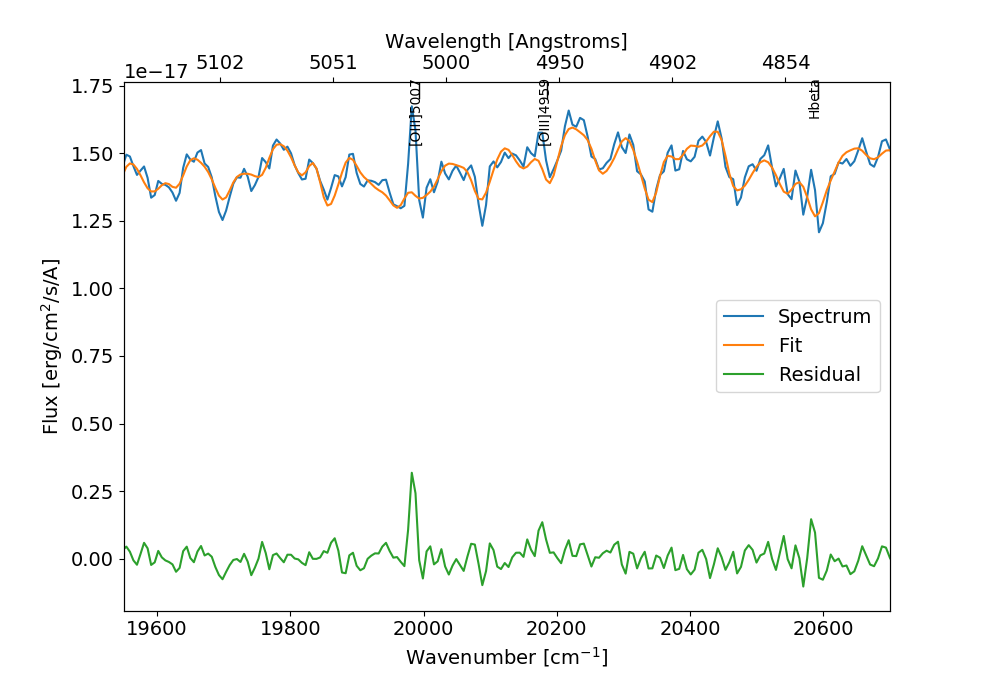

(19550, 20700)

In [23]:
x,y = 23,45
f, ax = plot_spectra(1e8/SN2_fitter.axis, SN2_fitter.spectra[x,y], label='Spectrum')
plot_spectra(1e8/SN2_fitter.axis, SN2_fitter.fitted_spectra[x,y], ax=ax, label='Fit')
plot_spectra(1e8/SN2_fitter.axis, SN2_fitter.spectra[x,y]-SN2_fitter.fitted_spectra[x,y], ax=ax, label='Residual')
add_lines_label(ax, 'SN2', -300., wavenumber=True, size=10)
ax.set_xlim(19550, 20700)

## Gas fit
We have toi go back to wavenumbers

In [10]:
def convert_wavenumber(spec, old_axis, new_axis):
    from scipy.interpolate import UnivariateSpline
    spl = UnivariateSpline(np.flip(1e8/old_axis, 0), np.flip(spec, 0), s=0, ext=1)
    new_spec = spl(new_axis.astype(np.float64))
#     new_spec[new_spec == 0.] = np.nan
    return new_spec

In [ ]:
SN2_subtracted = SN2_fitter.spectra -SN2_fitter.fitted_spectra

In [11]:
wn_subtracted_cube = parallel_apply_along_axis(convert_wavenumber, 2, SN2_subtracted[...,:-5], SN2_fitter.axis[:-5], SN2_ORCS.params.base_axis)

INFO| Init of the parallel processing server with 16 threads


In [12]:
X,Y = np.mgrid[14:2047:30, 14:2063:30]
cube = SN2_ORCS
orig_map = cube.get_theta_map()
theta_map = orig_map[X,Y]
# theta_map = np.zeros(SN2_subtracted.shape[:2])
# for i,j in np.ndindex(theta_map.shape):
#     big_box = centered_square_region(X[i,j], Y[i,j],30)
#     medium_box = centered_square_region(X[i,j], Y[i,j],5)
#     mask = np.zeros((2048,2064))
#     mask[big_box] = 1.
#     mask[medium_box] = 0.
#     theta_map[i,j] = np.nanmean(orig_map[np.nonzero(mask)])

In [21]:
wn_subtracted_cube[np.isnan(wn_subtracted_cube)] = 0.

In [22]:
input_cube = np.zeros((wn_subtracted_cube.shape[0], wn_subtracted_cube.shape[1], 3), dtype=object)
for x,y in np.ndindex(input_cube.shape[:2]):
    input_cube[x,y,:] = [wn_subtracted_cube[x,y,:], theta_map[x,y], SN2_fitter.error[x,y,0]]

In [45]:
def fit_gas_lines(z_dim, cube, lines = ['[OIII]5007'], debug = False, **kwargs):
    from sitelle.fit import guess_source_velocity, refine_velocity_guess
    from orcs.utils import fit_lines_in_spectrum
    a = cube.params.base_axis
    bkg_spec = z_dim[0]
    theta = z_dim[1]
    err = z_dim[2]
    
    kwargs.update({'fmodel':'sincgauss'})
    kwargs.update({'pos_def':['1']})
    kwargs.update({'sigma_def':['1']})
    kwargs.update({'sigma_cov':50})
    kwargs.update({'fwhm_def':['1']})
    kwargs.update({'signal_range':(19500,20500)})
    try:
        v_guess, l = guess_source_velocity(bkg_spec, cube, lines=lines, force=True, return_line=True)
    except ValueError:
        v_guess = -300.
        l = lines[0]
    try:
        #logging.info('V_guess before refine %s'%v_guess)
        coeff = np.nanmax(bkg_spec)
        v_guess = refine_velocity_guess(bkg_spec/coeff, a, v_guess, l)
        #logging.info('V_guess after refine %s'%v_guess)
    except Exception as e:
        pass
    
    kwargs['pos_cov'] = v_guess
    cube._prepare_input_params(lines, nofilter = True, **kwargs)
    fit_params_bkg = fit_lines_in_spectrum(cube.params, cube.inputparams, cube.fit_tol,
                                    bkg_spec, theta,  snr_guess=None,  debug=debug)
    if fit_params_bkg == []:
        return np.nan
    else:
        return fit_params_bkg['velocity'][0]
    

In [46]:
SN2_ORCS.inputparams = {}

In [50]:
fit_params = np.apply_along_axis(fit_gas_lines, 2, input_cube, SN2_ORCS)

WARNING| /home/blaunet/sitelle_env/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in divide



Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fit.py", line 447, in fit
    maxfev=self.max_iter)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/scipy/optimize/minpack.py", line 701, in curve_fit
    ydata = np.asarray_chkfinite(ydata)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/numpy/lib/function_base.py", line 1233, in asarray_chkfinite
    "array must not contain infs or NaNs")
ValueError: array must not contain infs or NaNs

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fi

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fit.py", line 447, in fit
    maxfev=self.max_iter)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/scipy/optimize/minpack.py", line 701, in curve_fit
    ydata = np.asarray_chkfinite(ydata)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/numpy/lib/function_base.py", line 1233, in asarray_chkfinite
    "array must not contain infs or NaNs")
ValueError: array must not contain infs or NaNs

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fi

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fit.py", line 447, in fit
    maxfev=self.max_iter)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/scipy/optimize/minpack.py", line 701, in curve_fit
    ydata = np.asarray_chkfinite(ydata)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/numpy/lib/function_base.py", line 1233, in asarray_chkfinite
    "array must not contain infs or NaNs")
ValueError: array must not contain infs or NaNs

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fi

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fit.py", line 447, in fit
    maxfev=self.max_iter)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/scipy/optimize/minpack.py", line 701, in curve_fit
    ydata = np.asarray_chkfinite(ydata)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/numpy/lib/function_base.py", line 1233, in asarray_chkfinite
    "array must not contain infs or NaNs")
ValueError: array must not contain infs or NaNs

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fi

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fit.py", line 447, in fit
    maxfev=self.max_iter)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/scipy/optimize/minpack.py", line 701, in curve_fit
    ydata = np.asarray_chkfinite(ydata)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/numpy/lib/function_base.py", line 1233, in asarray_chkfinite
    "array must not contain infs or NaNs")
ValueError: array must not contain infs or NaNs

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fi

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fit.py", line 447, in fit
    maxfev=self.max_iter)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/scipy/optimize/minpack.py", line 701, in curve_fit
    ydata = np.asarray_chkfinite(ydata)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/numpy/lib/function_base.py", line 1233, in asarray_chkfinite
    "array must not contain infs or NaNs")
ValueError: array must not contain infs or NaNs

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fi

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fit.py", line 447, in fit
    maxfev=self.max_iter)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/scipy/optimize/minpack.py", line 701, in curve_fit
    ydata = np.asarray_chkfinite(ydata)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/numpy/lib/function_base.py", line 1233, in asarray_chkfinite
    "array must not contain infs or NaNs")
ValueError: array must not contain infs or NaNs

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fi

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fit.py", line 447, in fit
    maxfev=self.max_iter)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/scipy/optimize/minpack.py", line 701, in curve_fit
    ydata = np.asarray_chkfinite(ydata)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/numpy/lib/function_base.py", line 1233, in asarray_chkfinite
    "array must not contain infs or NaNs")
ValueError: array must not contain infs or NaNs

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fi

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fit.py", line 447, in fit
    maxfev=self.max_iter)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/scipy/optimize/minpack.py", line 701, in curve_fit
    ydata = np.asarray_chkfinite(ydata)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/numpy/lib/function_base.py", line 1233, in asarray_chkfinite
    "array must not contain infs or NaNs")
ValueError: array must not contain infs or NaNs

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fi

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fit.py", line 447, in fit
    maxfev=self.max_iter)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/scipy/optimize/minpack.py", line 701, in curve_fit
    ydata = np.asarray_chkfinite(ydata)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/numpy/lib/function_base.py", line 1233, in asarray_chkfinite
    "array must not contain infs or NaNs")
ValueError: array must not contain infs or NaNs

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fi

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fit.py", line 447, in fit
    maxfev=self.max_iter)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/scipy/optimize/minpack.py", line 701, in curve_fit
    ydata = np.asarray_chkfinite(ydata)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/numpy/lib/function_base.py", line 1233, in asarray_chkfinite
    "array must not contain infs or NaNs")
ValueError: array must not contain infs or NaNs

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fi

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fit.py", line 447, in fit
    maxfev=self.max_iter)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/scipy/optimize/minpack.py", line 701, in curve_fit
    ydata = np.asarray_chkfinite(ydata)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/numpy/lib/function_base.py", line 1233, in asarray_chkfinite
    "array must not contain infs or NaNs")
ValueError: array must not contain infs or NaNs

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fi

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fit.py", line 447, in fit
    maxfev=self.max_iter)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/scipy/optimize/minpack.py", line 701, in curve_fit
    ydata = np.asarray_chkfinite(ydata)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/numpy/lib/function_base.py", line 1233, in asarray_chkfinite
    "array must not contain infs or NaNs")
ValueError: array must not contain infs or NaNs

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fi

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fit.py", line 447, in fit
    maxfev=self.max_iter)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/scipy/optimize/minpack.py", line 701, in curve_fit
    ydata = np.asarray_chkfinite(ydata)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/numpy/lib/function_base.py", line 1233, in asarray_chkfinite
    "array must not contain infs or NaNs")
ValueError: array must not contain infs or NaNs

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fi

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fit.py", line 447, in fit
    maxfev=self.max_iter)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/scipy/optimize/minpack.py", line 701, in curve_fit
    ydata = np.asarray_chkfinite(ydata)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/numpy/lib/function_base.py", line 1233, in asarray_chkfinite
    "array must not contain infs or NaNs")
ValueError: array must not contain infs or NaNs

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fi

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fit.py", line 447, in fit
    maxfev=self.max_iter)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/scipy/optimize/minpack.py", line 701, in curve_fit
    ydata = np.asarray_chkfinite(ydata)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/numpy/lib/function_base.py", line 1233, in asarray_chkfinite
    "array must not contain infs or NaNs")
ValueError: array must not contain infs or NaNs

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fi

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fit.py", line 447, in fit
    maxfev=self.max_iter)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/scipy/optimize/minpack.py", line 701, in curve_fit
    ydata = np.asarray_chkfinite(ydata)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/numpy/lib/function_base.py", line 1233, in asarray_chkfinite
    "array must not contain infs or NaNs")
ValueError: array must not contain infs or NaNs

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fi

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fit.py", line 447, in fit
    maxfev=self.max_iter)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/scipy/optimize/minpack.py", line 701, in curve_fit
    ydata = np.asarray_chkfinite(ydata)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/numpy/lib/function_base.py", line 1233, in asarray_chkfinite
    "array must not contain infs or NaNs")
ValueError: array must not contain infs or NaNs

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fi

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fit.py", line 447, in fit
    maxfev=self.max_iter)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/scipy/optimize/minpack.py", line 701, in curve_fit
    ydata = np.asarray_chkfinite(ydata)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/numpy/lib/function_base.py", line 1233, in asarray_chkfinite
    "array must not contain infs or NaNs")
ValueError: array must not contain infs or NaNs

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fi

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fit.py", line 447, in fit
    maxfev=self.max_iter)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/scipy/optimize/minpack.py", line 701, in curve_fit
    ydata = np.asarray_chkfinite(ydata)
  File "/home/blaunet/sitelle_env/lib/python2.7/site-packages/numpy/lib/function_base.py", line 1233, in asarray_chkfinite
    "array must not contain infs or NaNs")
ValueError: array must not contain infs or NaNs

Traceback (most recent call last):
  File "/home/blaunet/orcs/orcs/utils.py", line 131, in fit_lines_in_spectrum
    **kwargs)
  File "/home/blaunet/orb/orb/fit.py", line 2602, in _fit_lines_in_spectrum
    fit = fv.fit(compute_mcmc_error=compute_mcmc_error)
  File "/home/blaunet/orb/orb/fi

In [52]:
io.write_fits('/obs/blaunet/fits/OIII_velocity.fits', fit_params)

INFO| Data written as /obs/blaunet/fits/OIII_velocity.fits in 0.06 s 


'/obs/blaunet/fits/OIII_velocity.fits'

In [34]:
V_map = io.read_fits('/obs/blaunet/fits/OIII_velocity.fits')

<IPython.core.display.Javascript object>


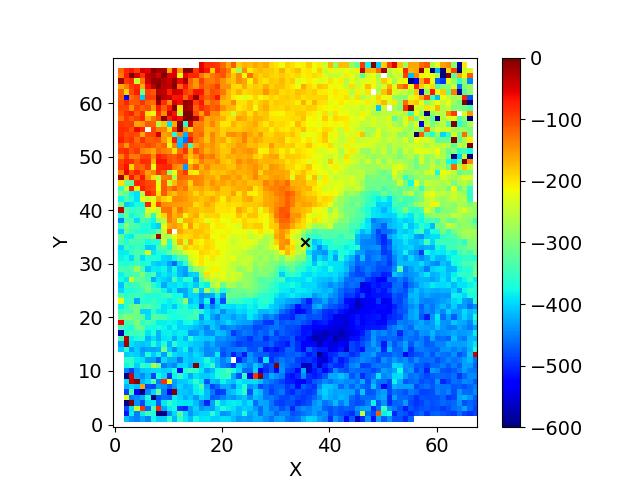

In [40]:
f,ax = plot_map(V_map, cmap='jet', colorbar=True, vmin = -600, vmax = 0)
ax.scatter(x_center_bis, y_center_bis, marker='x', c='k')

In [52]:
def get_param_map(fit_params, p):
    p_map = np.zeros_like(fit_params, dtype=np.float64)
   
    for i,j in np.ndindex(p_map.shape):
#         if type(fit_params[i,j][p]) is np.ndarray:
#             p_map[i,j] = fit_params[i,j][p][0]
#         else:
        p_map[i,j] = fit_params[i,j][p]
    return p_map
            

In [53]:
V = get_param_map(fit_params, 'velocity')

In [56]:
fit_params

array([], shape=(68, 69, 0), dtype=float64)

<IPython.core.display.Javascript object>


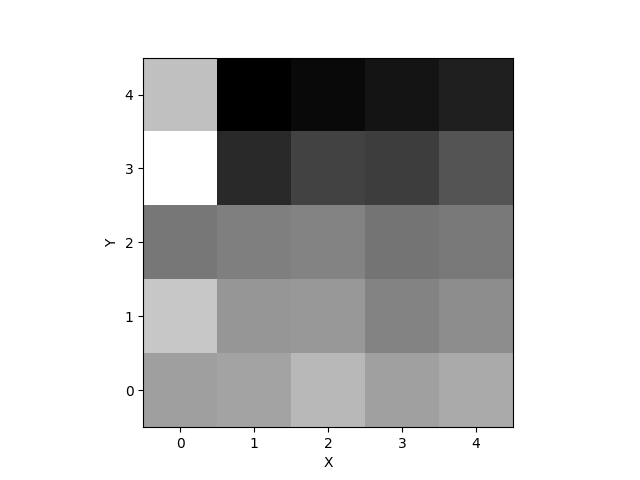

(<matplotlib.figure.Figure at 0x7efe27c2e210>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efe2780fa10>)

In [50]:
plot_map(V)

<IPython.core.display.Javascript object>


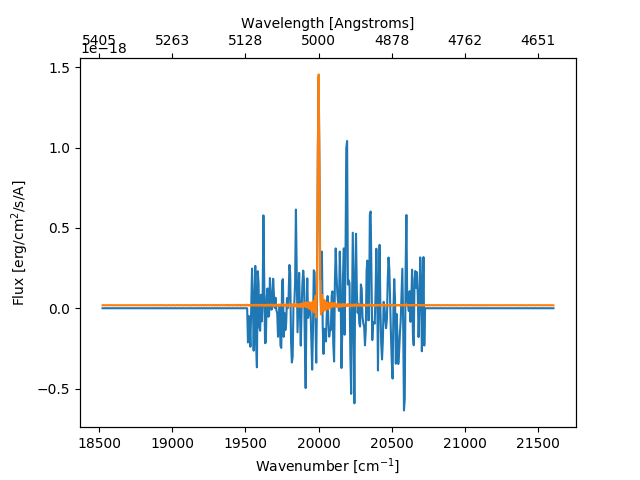

(<matplotlib.figure.Figure at 0x7f3480203110>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f34802960d0>)

In [31]:
fig,ax = plot_spectra(SN2_ORCS.params.base_axis, wn_subtracted_cube[21,20])
plot_spectra(SN2_ORCS.params.base_axis, f[1,0]['fitted_vector'], ax=ax)

In [18]:
def measure_velocity(spec, cube, lines=['[OIII]5007']):
    from sitelle.fit import guess_source_velocity, refine_velocity_guess
    a = cube.params.base_axis
    try:
        v_guess, l = guess_source_velocity(spec, cube, lines=lines, force=True, return_line=True)
    except ValueError:
        return None
    try:
        coeff = np.nanmax(spec)
        v_guess = refine_velocity_guess(spec/coeff, a, v_guess, l)
    except Exception as e:
        print e
        pass
    return v_guess

In [19]:
V = np.apply_along_axis(measure_velocity, 2, wn_subtracted_cube[15:20, 15:20], SN2_ORCS)

In [20]:
V

array([[-405.45247028, -448.41977745, -398.41977745, -414.84003026,
        -398.41977745],
       [-411.6222747 , -448.41977745, -408.42179198, -424.22726216,
        -414.71070668],
       [-448.41977745, -411.53210143, -448.41977745, -448.41977745,
        -398.41977745],
       [-422.72377551, -398.41977745, -448.41977745, -407.6430867 ,
        -410.28349198],
       [-448.41977745, -448.41977745, -406.52331072, -398.41977745,
        -425.91617774]])

<IPython.core.display.Javascript object>


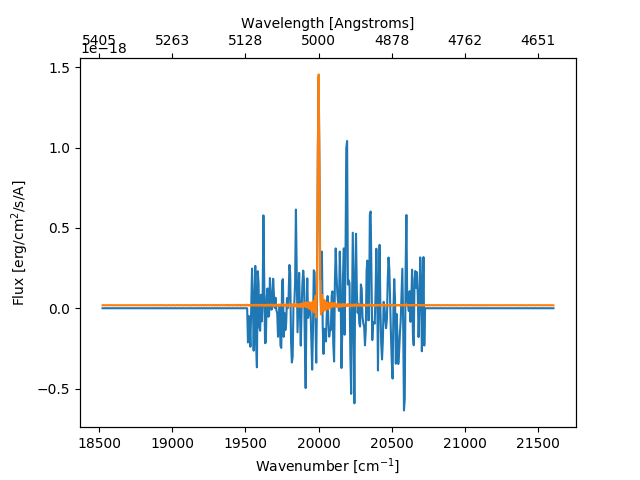

(<matplotlib.figure.Figure at 0x7ff6ab015950>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff6abd7ff10>)

In [40]:
fig, ax = plot_spectra(SN2_ORCS.params.base_axis, wn_subtracted_cube[21,20])
plot_spectra(SN2_ORCS.params.base_axis, f['fitted_vector'], ax=ax)

In [ ]:
cube = SN2_ORCS
kwargs_bkg = {}
bkg_spec

kwargs_bkg.update({'fmodel':'gaussian'})
kwargs_bkg.update({'fwhm_def':['1']})
kwargs_bkg.update({'signal_range':(19500,20500)})

lines = ['[OIII]5007']
v_guess, l = guess_source_velocity(bkg_spec, cube, lines=lines, force=True, return_line=True)

In [ ]:
cube = SN2_ORCS
kwargs_bkg = {}
kwargs_bkg.update({'fmodel':'gaussian'})
kwargs_bkg.update({'fwhm_def':['1']})
kwargs_bkg.update({'signal_range':(19500,20500)})

lines = ['[OIII]5007']
v_guess, l = guess_source_velocity(bkg_spec, cube, lines=lines, force=True, return_line=True)
try:
    logging.info('V_guess before refine %s'%v_guess)
    coeff = np.nanmax(bkg_spec)
    v_guess = refine_velocity_guess(bkg_spec/coeff, a, v_guess, l)
    logging.info('V_guess after refine %s'%v_guess)
except Exception as e:
    pass
fit_res['bkg_v_guess'] = v_guess
kwargs_bkg['pos_cov'] = v_guess
cube._prepare_input_params(lines, nofilter = True, **kwargs_bkg)
fit_params_bkg = fit_lines_in_spectrum(cube.params, cube.inputparams, cube.fit_tol,
                                    bkg_spec, theta_orig,
                                    snr_guess=bkg_err,  debug=debug)

if fit_params_bkg == []:
    fit_res['bkg_exit_status'] = 2
else:
    fit_res['bkg_exit_status'] = 0
    fit_res['bkg_velocity'] = fit_params_bkg['velocity'][0]
    fit_res['bkg_velocity_err'] = fit_params_bkg['velocity_err'][0]

In [60]:
from astropy.coordinates import Angle
import astropy.units as u
d = Angle(0.32, unit=u.arcsec)


In [51]:
d = Angle(5.5, unit=u.arcmin)
d.arcsec

330.0

In [28]:
out = np.load('../../fits/SN2_lines_20_11.npy')
SN2_velocity_map = np.zeros((43,43))
#gas_after_nburst_lines = np.zeros_like(SN2_clean)
for x,y in np.ndindex(SN2_velocity_map.shape):
    try:
        SN2_velocity_map[x,y] = out[x,y]['fit_params']['velocity'][0]
        #gas_after_nburst_lines[x,y,:] = out[x,y]['line_spectra']
    except TypeError:
        SN2_velocity_map[x,y] = np.nan
        #gas_after_nburst_lines[x,y,:] = np.nan * np.ones(556)

<IPython.core.display.Javascript object>


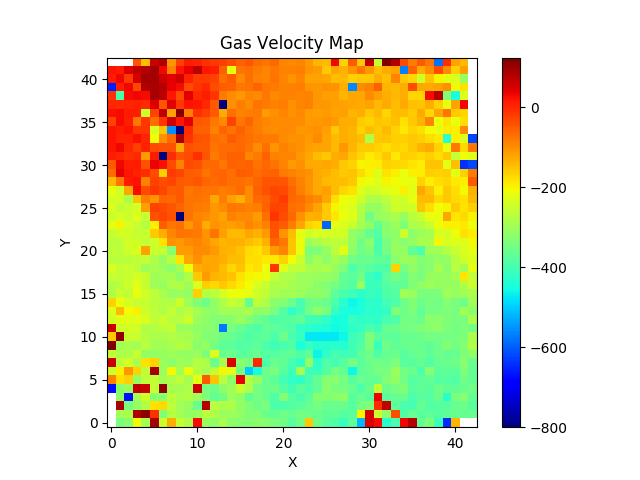

Text(0.5,1,u'Gas Velocity Map')

In [65]:
f,ax = plot_map(SN2_velocity_map, cmap='jet', colorbar=True, vmin=-800)
ax.set_title('Gas Velocity Map')

## Analysis

<IPython.core.display.Javascript object>


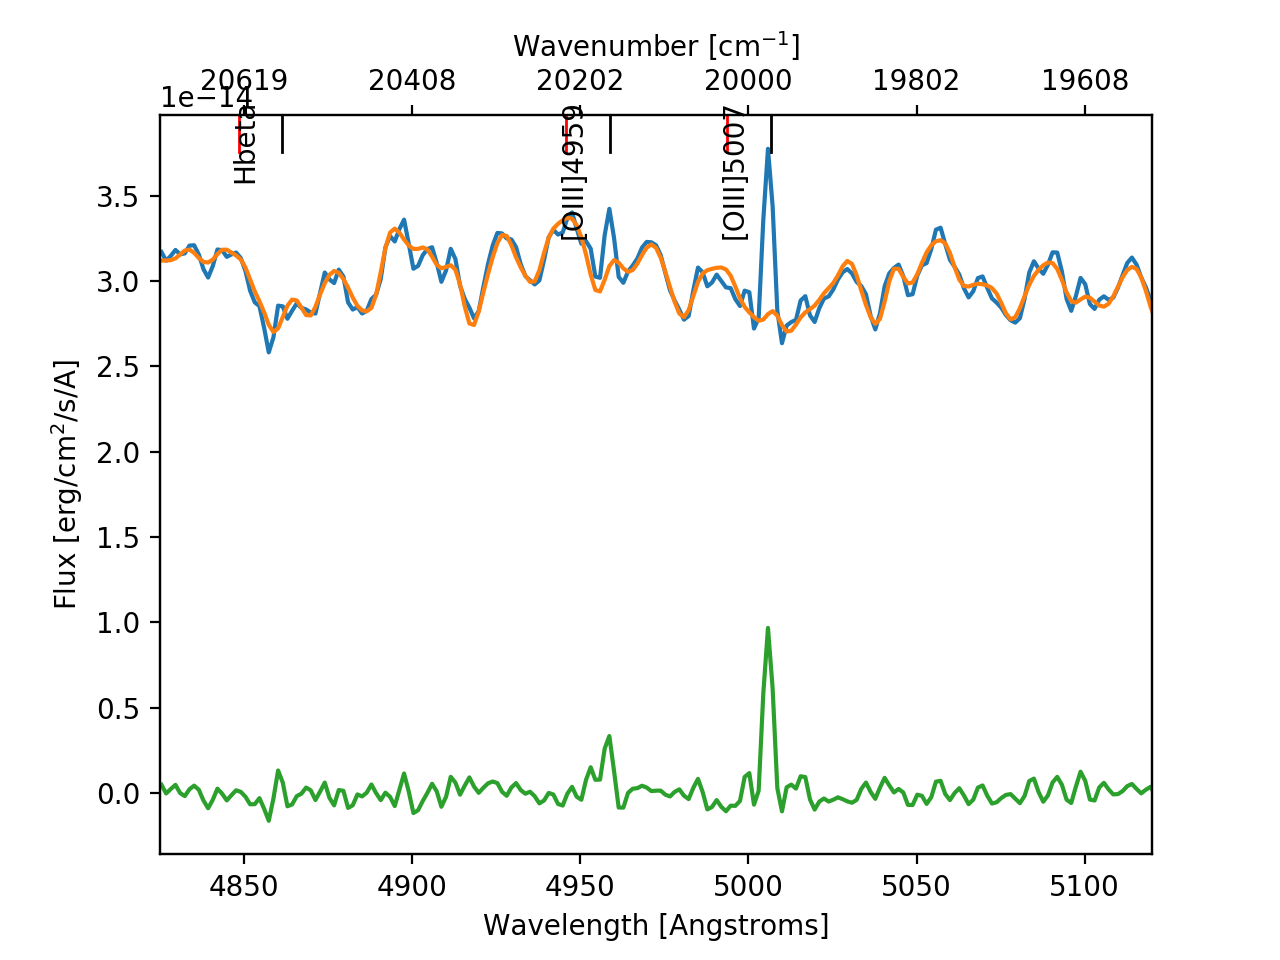

In [8]:
x,y = 15,30
f,ax = plt.subplots()
make_wavelength_axes(ax, xlim=(4825,5120))
ax.plot(SN2_fitter.axis, SN2_fitter.spectra[x,y])
ax.plot(SN2_fitter.axis, SN2_fitter.fitted_spectra[x,y])
ax.plot(SN2_fitter.axis,SN2_fitter.spectra[x,y]- SN2_fitter.fitted_spectra[x,y])
add_lines_label(ax, 'SN2', [0., -800.])

## SN3

### Creation of the fitter

In [9]:
# SN3_fitter_list = []
# SN3_fwhm_map = SN3_ORCS.get_fwhm_map()
# i = 0
# for x,y in np.ndindex(SN3_48x48.shape[:-1]):
#     spectra = SN3_48x48[x,y]
#     error = estimate_noise(SN3_axis, spectra, SN3_ORCS.get_filter_range())
#     fwhm = SN3_fwhm_map[x*48:(x+1)*48, y*48:(y+1)*48].mean()
#     fitter = NburstFitter.from_sitelle_data(SN3_axis, spectra, error, fwhm,
#                                             SN3_ORCS, '../fits/nburst_data/SN3/bins/',
#                                             '%d_%d'%(x,y),
#                                             force=True)

#     kwargs = {'fixpar':[0,0,0,0]}
#     if not np.isnan(SN2_fitter.idl_result['V'][SN2_fitter.bin_table][x,y]):
#         kwargs['vsys'] = SN2_fitter.idl_result['V'][SN2_fitter.bin_table][x,y]
#     if not np.isnan(SN2_fitter.idl_result['SIG'][SN2_fitter.bin_table][x,y]):
#         kwargs['sig_guess'] = SN2_fitter.idl_result['SIG'][SN2_fitter.bin_table][x,y]
#     if not np.isnan(SN2_fitter.idl_result['MET'][SN2_fitter.bin_table][x,y]):
#         kwargs['met_guess'] = SN2_fitter.idl_result['MET'][SN2_fitter.bin_table][x,y]
#         kwargs['fixpar'][3] = 1
#     if not np.isnan(SN2_fitter.idl_result['AGE'][SN2_fitter.bin_table][x,y]):
#         kwargs['age_guess'] = SN2_fitter.idl_result['AGE'][SN2_fitter.bin_table][x,y]
#         kwargs['fixpar'][2] = 1
    
#     fitter.configure_fit('MILES_fromSN2',silent=True, stell_lib='MILES', mdegree=4, **kwargs)
#     SN3_fitter_list.append(fitter)


### Or load from previous

In [10]:
SN3_fitter_list = []
for x,y in np.ndindex(SN3_48x48.shape[:-1]):
    fitter = NburstFitter.from_previous('../fits/nburst_data/SN3/bins/', '%d_%d'%(x,y),'MILES_fromSN2' )
    SN3_fitter_list.append(fitter)

In [11]:
SN3_fitter = NburstFitterList(SN3_fitter_list)

In [12]:
#SN3_fitter.run_each()
SN3_fitter.read_result(force=True)

Can not load results for /home/blaunet/fits/nburst_data/SN3/bins/0_42_MILES_fromSN2_fitted.fits; the fit probably didn't converge
Can not load results for /home/blaunet/fits/nburst_data/SN3/bins/1_42_MILES_fromSN2_fitted.fits; the fit probably didn't converge
Can not load results for /home/blaunet/fits/nburst_data/SN3/bins/2_42_MILES_fromSN2_fitted.fits; the fit probably didn't converge
Can not load results for /home/blaunet/fits/nburst_data/SN3/bins/3_42_MILES_fromSN2_fitted.fits; the fit probably didn't converge
Can not load results for /home/blaunet/fits/nburst_data/SN3/bins/4_42_MILES_fromSN2_fitted.fits; the fit probably didn't converge
Can not load results for /home/blaunet/fits/nburst_data/SN3/bins/5_42_MILES_fromSN2_fitted.fits; the fit probably didn't converge
Can not load results for /home/blaunet/fits/nburst_data/SN3/bins/6_42_MILES_fromSN2_fitted.fits; the fit probably didn't converge
Can not load results for /home/blaunet/fits/nburst_data/SN3/bins/7_42_MILES_fromSN2_fitted

error: [Errno 24] Too many open files

In [13]:
fits.open('../fi')

IOError: [Errno 24] Too many open files: '../fi'

<IPython.core.display.Javascript object>


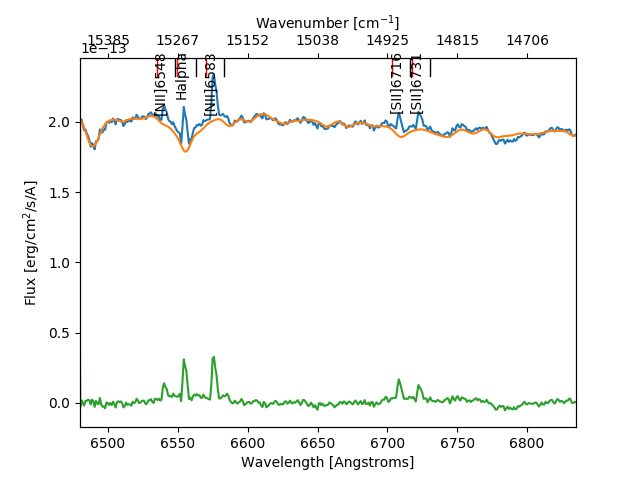

In [13]:
x,y = 22,22
f, ax = plt.subplots()
make_wavelength_axes(ax, xlim=(6480,6835))
ax.plot(SN3_fitter.axis, SN3_fitter.spectra[SN2_fitter.bin_table][x,y])
ax.plot(SN3_fitter.axis, SN3_fitter.fitted_spectra[SN2_fitter.bin_table][x,y])
ax.plot(SN3_fitter.axis, SN3_fitter.spectra[SN2_fitter.bin_table][x,y]-SN3_fitter.fitted_spectra[SN2_fitter.bin_table][x,y])
add_lines_label(ax, 'SN3', [0., -600])

## Some Histograms

<IPython.core.display.Javascript object>


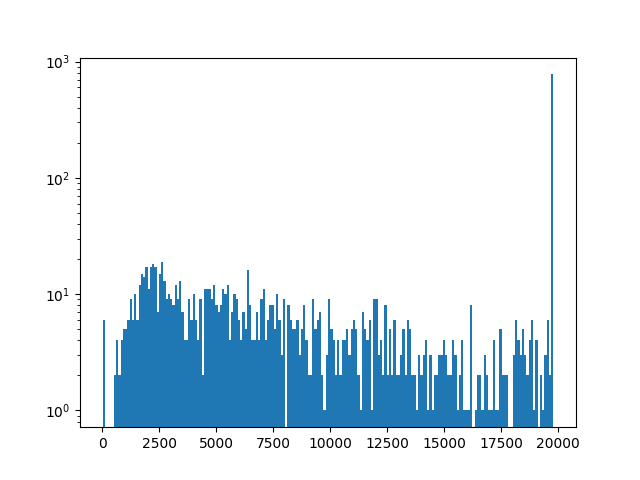

In [19]:
f,ax = plt.subplots()
ax.hist(SN2_fitter.idl_result['AGE'][~np.isnan(SN2_fitter.idl_result['AGE'])], bins=200)
ax.set_yscale("log", nonposy='clip')
f.show()

WARNING| /usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  



5 6


<IPython.core.display.Javascript object>


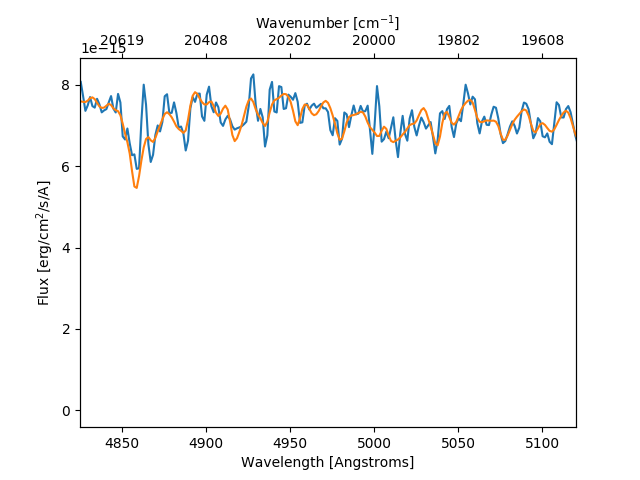

In [190]:
i = 0
for x,y in np.argwhere(SN2_fitter.idl_result['AGE'][SN2_fitter.bin_table] < 2500):
    if x < 5 or y < 5:
        continue
    print x,y
    f, ax = plt.subplots()
    ax.plot(SN2_fitter.axis, SN2_fitter.spectra[x,y])
    ax.plot(SN2_fitter.axis, SN2_fitter.fitted_spectra[x,y])
    make_wavelength_axes(ax, xlim=(4825,5120))
    f.show()
    break

In [158]:
SN2_fitter.idl_result['AGE'][~np.isnan(SN2_fitter.idl_result['AGE'])]

array([  8808.01150684,  19800.00006332,     37.01206881, ...,
        19800.00006332,  19800.00006332,  19800.00006332])

## Fit Gas Lines

In [22]:
def interpolator(spec, old_axis, new_axis):
    return UnivariateSpline(np.flip(1e8/old_axis,0), np.flip(spec,0), s=0, ext='zeros')(new_axis.astype(float))

In [23]:
SN2_clean = SN2_48x48 - np.apply_along_axis(interpolator, -1, SN2_fitter.fitted_spectra, SN2_fitter.axis, SN2_axis)
SN3_clean = SN3_48x48 - np.apply_along_axis(interpolator, -1, SN3_fitter.fitted_spectra[SN2_fitter.bin_table], SN3_fitter.axis, SN3_axis)

### SN2

In [24]:
SN2_theta_map = SN2_ORCS.get_theta_map()
SN2_input_cube = np.zeros((SN2_clean.shape[0], SN2_clean.shape[1], 2), dtype=object)
for x,y in np.ndindex(SN2_input_cube.shape[:2]):
    SN2_input_cube[x,y,:] = [SN2_clean[x,y,:], SN2_theta_map[x*48:(x+1)*48, y*48:(y+1)*48].mean()]

In [25]:
lines = ['[OIII]5007', '[OIII]4959', 'Hbeta']
kwargs={'fmodel':'sincgauss', 'pos_def':'1', 'sigma_cov':[gvar.gvar(30, 10)], 'sigma_def':['1']}

SN2_ORCS._prepare_input_params(lines, nofilter=True, signal_range=[19550,20700], **kwargs)
inputparams = SN2_ORCS.inputparams.convert()
params = SN2_ORCS.params.convert()
V_range = np.linspace(0,-600,7)
#V_range = np.linspace(0,-500,6)
snr_guess = None

In [26]:
# x,y = 12,15
# d = fit_gas_lines(SN2_input_cube[x,y,:], inputparams, params, lines, V_range, snr_guess=snr_guess)
# display(d['fit_params'])
# f, ax = plt.subplots()
# ax.plot(1e8/SN2_axis, d['line_spectra'])
# ax.plot(1e8/SN2_axis, SN2_clean[x,y])
# make_wavelength_axes(ax, xlim=(4825, 5125))
# add_lines_label(ax, 'SN2', -300.)
# f.show()

In [27]:
# out = parallel_apply_along_axis(fit_gas_lines, 2, SN2_input_cube,
#                               inputparams,
#                               params,
#                               lines,
#                               V_range,
#                               #depfuncs=(),
#                               #modules=('from sitelle.fit import parse_line_params, chi2_func',
#                               #         'from orcs.utils import fit_lines_in_spectrum'),
#                               snr_guess = snr_guess)

In [28]:
# np.save('../fits/SN2_lines_20_11.npy', out)
out = np.load('../fits/SN2_lines_20_11.npy')

In [30]:
SN2_velocity_map = np.zeros((43,43))
gas_after_nburst_lines = np.zeros_like(SN2_clean)
for x,y in np.ndindex(SN2_velocity_map.shape):
    try:
        SN2_velocity_map[x,y] = out[x,y]['fit_params']['velocity'][0]
        gas_after_nburst_lines[x,y,:] = out[x,y]['line_spectra']
    except TypeError:
        velocity_map[x,y] = np.nan
        gas_after_nburst_lines[x,y,:] = np.nan * np.ones(556)

<IPython.core.display.Javascript object>


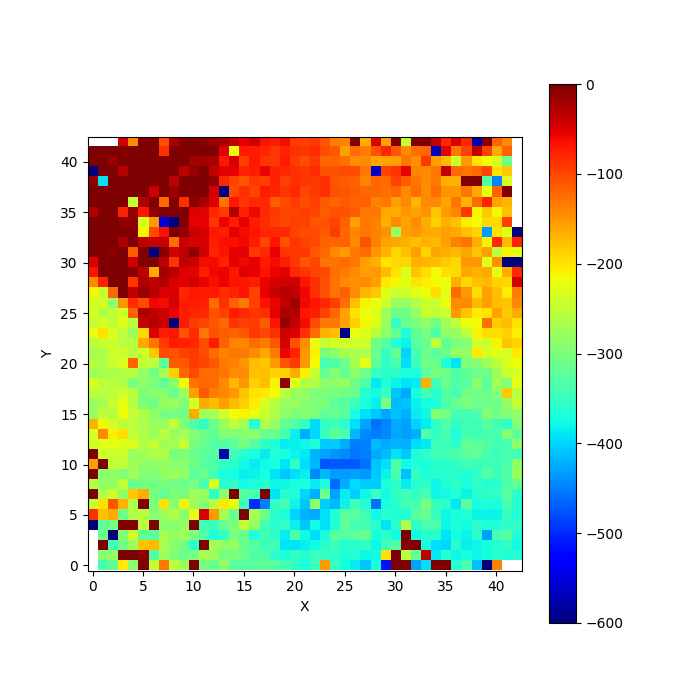

In [31]:
map_fig, _ = plot_map(velocity_map, cmap='jet', colorbar=True, vmin=-600, vmax=0)

### SN3

In [32]:
SN3_theta_map = SN3_ORCS.get_theta_map()
SN3_input_cube = np.zeros((SN3_clean.shape[0], SN3_clean.shape[1], 2), dtype=object)
for x,y in np.ndindex(SN3_input_cube.shape[:2]):
    SN3_input_cube[x,y,:] = [SN3_clean[x,y,:], SN3_theta_map[x*48:(x+1)*48, y*48:(y+1)*48].mean()]

In [33]:
lines=['[NII]6548','[NII]6583', 'Halpha', '[SII]6716', '[SII]6731']
kwargs={'fmodel':'sincgauss', 'pos_def':'1', 'sigma_def':['1'], 'sigma_cov':[gvar.gvar(10, 1)]}

SN3_ORCS._prepare_input_params(lines, nofilter=True, signal_range=[14750, 15380],**kwargs)
inputparams = SN3_ORCS.inputparams.convert()
params = SN3_ORCS.params.convert()
V_range = np.linspace(0,-600,7)
#V_range = [gvar.gvar(v,50) for v in V_range]
snr_guess = None

In [34]:
# def ylim_on_range(spec, axis, xlim):
#     imin, imax = np.searchsorted(axis, xlim)
#     return (spec[imin:imax].min(), spec[imin:imax].max())
# x,y = 20,22
# #x,y = 6,6
# d = fit_gas_lines(SN3_input_cube[x,y,:], inputparams, params, lines, V_range, snr_guess=snr_guess)
# display(d['fit_params'])
# f, ax = plt.subplots()
# ax.plot(SN3_axis, d['line_spectra'])
# ax.plot(SN3_axis, SN3_clean[x,y,:])
# make_wavenumber_axes(ax, xlim=(14750, 15380), ylim=ylim_on_range(SN3_clean[x,y], SN3_axis, (14750, 15380)))




# f.show()
# print 'V = ',d['fit_params']['velocity'][0]

In [150]:
# out = parallel_apply_along_axis(fit_gas_lines, 2, SN3_input_cube,
#                               inputparams,
#                               params,
#                               lines,
#                               V_range,
#                               #depfuncs=(),
#                               #modules=('from sitelle.fit import parse_line_params, chi2_func',
#                               #         'from orcs.utils import fit_lines_in_spectrum'),
#                               snr_guess = snr_guess)

INFO| Init of the parallel processing server with 8 threads


Init V =  0.0 Fitted V =  16.4430215517 Chi2 =  23.0106550983
Init V =  -100.0 Fitted V =  -57.4765329125 Chi2 =  26.1150653156
Init V =  -200.0 Fitted V =  -194.859653564 Chi2 =  27.7445498075
Init V =  -300.0 Fitted V =  -274.976268878 Chi2 =  32.1573232521
Init V =  -400.0 Fitted V =  -418.611048388 Chi2 =  32.1176242241
Init V =  -500.0 Fitted V =  -418.609897443 Chi2 =  32.1176240345
Init V =  -600.0 Fitted V =  -607.473765016 Chi2 =  38.5001178372
Init V =  0.0 Fitted V =  22.9051029325 Chi2 =  16.6568735126
Init V =  -100.0 Fitted V =  -53.7497863746 Chi2 =  15.7846614463
Init V =  -200.0 Fitted V =  -200.089358601 Chi2 =  18.2087678089
Init V =  -300.0 Fitted V =  -279.248033723 Chi2 =  19.543673474
Init V =  -400.0 Fitted V =  -422.759870116 Chi2 =  14.3375840707
Init V =  -500.0 Fitted V =  -422.759756582 Chi2 =  14.337585685
Init V =  -600.0 Fitted V =  -606.698155649 Chi2 =  20.933827869
Init V =  0.0 Fitted V =  -54.855551738 Chi2 =  10.0619888548
Init V =  -100.0 Fitted V

Init V =  0.0 Fitted V =  300.126696468 Chi2 =  1.69824412143
Init V =  -100.0 Fitted V =  -380.384893582 Chi2 =  1.69048888307
Init V =  -200.0 Fitted V =  -380.384870953 Chi2 =  1.69048897254
Init V =  -300.0 Fitted V =  -380.37820493 Chi2 =  1.69048905988
Init V =  -400.0 Fitted V =  -380.387524821 Chi2 =  1.69048889341
Init V =  -500.0 Fitted V =  -380.38775004 Chi2 =  1.69048888653
Init V =  -600.0 Fitted V =  -380.380679653 Chi2 =  1.69048918934
Init V =  0.0 Fitted V =  257.9091138 Chi2 =  0.988794645468
Init V =  -100.0 Fitted V =  257.909478658 Chi2 =  0.988794798437
Init V =  -200.0 Fitted V =  257.909311966 Chi2 =  0.98879472889
Init V =  -300.0 Fitted V =  -314.402932656 Chi2 =  2.20028131705
Init V =  -400.0 Fitted V =  -419.671069959 Chi2 =  0.970758989579
Init V =  -500.0 Fitted V =  -430.960607611 Chi2 =  0.999027063519
Init V =  -600.0 Fitted V =  -430.961530472 Chi2 =  0.999027924495
Init V =  0.0 Fitted V =  238.904269371 Chi2 =  1.11064132811
Init V =  -100.0 Fitted

In [35]:
# np.save('../fits/SN3_lines_20_11.npy', out)
out = np.load('../fits/SN3_lines_20_11.npy')

In [36]:
SN3_velocity_map = np.zeros((43,43))
gas_after_nburst_lines = np.zeros_like(SN3_clean)
for x,y in np.ndindex(SN3_velocity_map.shape):
    try:
        SN3_velocity_map[x,y] = out[x,y]['fit_params']['velocity'][0]
        gas_after_nburst_lines[x,y,:] = out[x,y]['line_spectra']
    except TypeError:
        SN3_velocity_map[x,y] = np.nan
        gas_after_nburst_lines[x,y,:] = np.nan * np.ones(840)

<IPython.core.display.Javascript object>


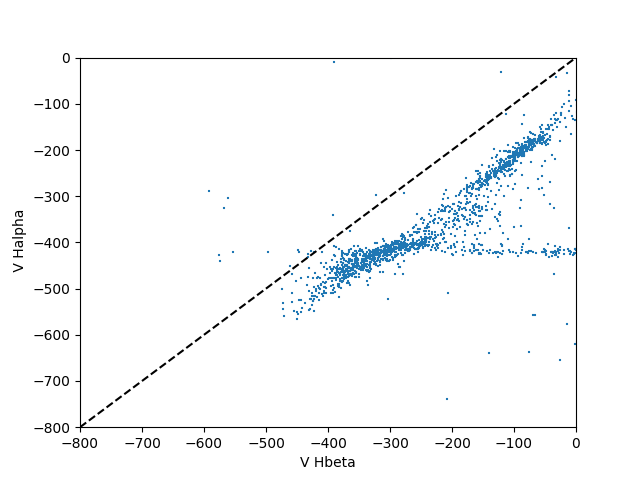

In [49]:
f, ax = plt.subplots()
ax.scatter(SN2_velocity_map.flatten(), SN3_velocity_map.flatten(), marker='+', s=1)
ax.plot(np.arange(-800,0), np.arange(-800,0), 'k--')
ax.set_xlabel('V Hbeta')
ax.set_ylabel(' V Halpha')
ax.set_xlim(-800,0)
ax.set_ylim(-800,0)
f.show()

<IPython.core.display.Javascript object>


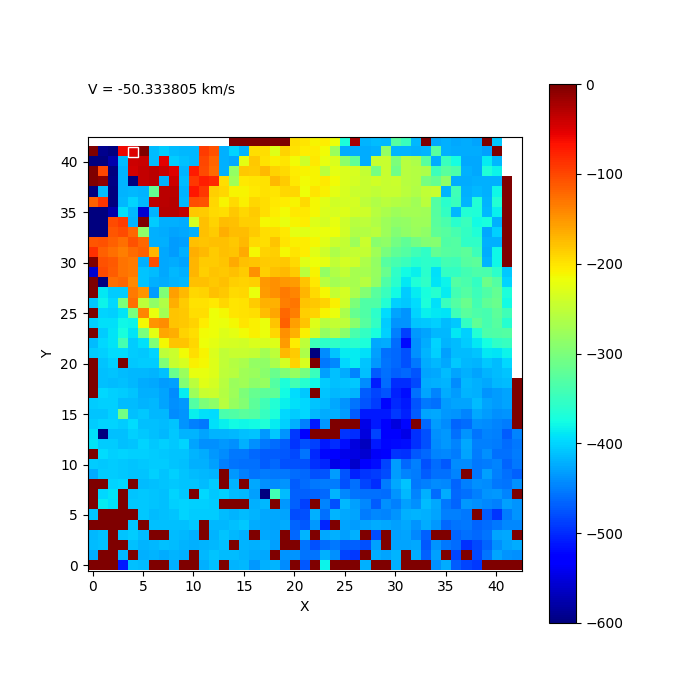

<IPython.core.display.Javascript object>


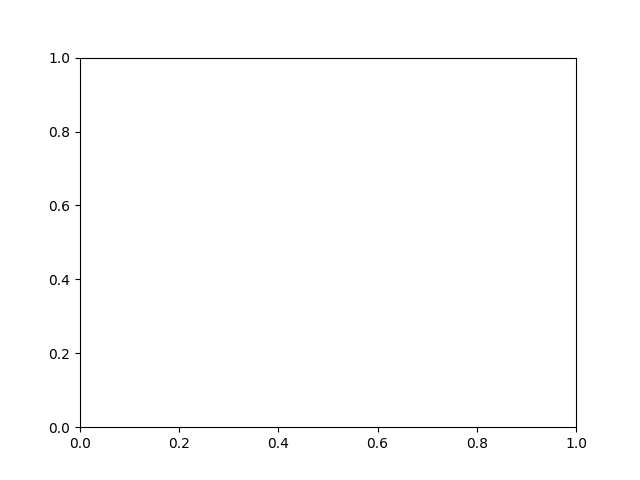

In [288]:
#Interactive plot
map_fig, _ = plot_map(velocity_map, cmap='jet', colorbar=True, vmin=-600, vmax=0)
spec_fig, spec_axis = plt.subplots()
spec_plotter = SpectraPlotter(SN3_axis, SN3_clean, gas_after_nburst_lines, spec_axis,
                              residual=False,
                              title='',
                              xlims=[14750, 15380],
                              label=['Nburst clean', 'Gas Lines fit', 'Residual'])
spec_plotter.connect(map_fig)
map_fig.show()

In [56]:
out[2,3]['fit_params']['flux'][1]

-3.0395048262191255e-15